In [8]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew
from dateutil import parser
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os
import IPython
import IPython.display
import tensorflow as tf
from keras.models import Model
import keras.layers as kl
import keras.activations as ka
import gc
import warnings
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import missingno as msno
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab
from scipy.stats import shapiro, skew, kurtosis
from sklearn.preprocessing import MinMaxScaler

## Merged Data

The enclosed datasets are generated from freshwater aquaponics catfish ponds. The datasets are generated automatically at 5 seconds intervals using the following water quality sensors driven by the ESP 32 microcontroller: Dallas Instrument Temperature sensor (DS18B20), DF Robot Turbidity sensor, DF Robot Dissolved Oxygen sensor, DF Robot pH sensor V2.2, MQ-137 Ammonia sensor, and MQ-135 Nitrate sensor.

The datasets and results in this section were sensor readings from June to mid-October 2021. There are 12 datasets, each from 12 aquaponics catfish ponds. Each of the 12 ponds IoT unit has six sensors (temperature, turbidity, dissolved oxygen, pH, ammonia, nitrate). As of the time of this report each unit has generated over 170,000 instances

In [2]:
# Load all the DataFrames
df1 = pd.read_csv("/Users/jabedhossain/Desktop/Python/Fish Farm Project/data/renamed_IoTpond1.csv")
df2 = pd.read_csv("/Users/jabedhossain/Desktop/Python/Fish Farm Project/data/renamed_IoTpond2.csv")
df3 = pd.read_csv("/Users/jabedhossain/Desktop/Python/Fish Farm Project/data/renamed_IoTpond3.csv")
df4 = pd.read_csv("/Users/jabedhossain/Desktop/Python/Fish Farm Project/data/renamed_IoTpond4.csv")
df6 = pd.read_csv("/Users/jabedhossain/Desktop/Python/Fish Farm Project/data/renamed_IoTpond6.csv")
df7 = pd.read_csv("/Users/jabedhossain/Desktop/Python/Fish Farm Project/data/renamed_IoTpond7.csv")
df8 = pd.read_csv("/Users/jabedhossain/Desktop/Python/Fish Farm Project/data/renamed_IoTpond8.csv")
df9 = pd.read_csv("/Users/jabedhossain/Desktop/Python/Fish Farm Project/data/renamed_IoTpond9.csv")
df10 = pd.read_csv("/Users/jabedhossain/Desktop/Python/Fish Farm Project/data/renamed_IoTpond10.csv")
df11 = pd.read_csv("/Users/jabedhossain/Desktop/Python/Fish Farm Project/data/renamed_IoTpond11.csv")
df12 = pd.read_csv("/Users/jabedhossain/Desktop/Python/Fish Farm Project/data/renamed_IoTpond12.csv")

# List of DataFrames
dfs = [df1, df2, df3, df4, df6, df7, df8, df9, df10, df11, df12]


In [3]:
# List of DataFrames
dfs = [df1, df2, df3, df4, df6, df7, df8, df9, df10, df11, df12]

# Concatenate all DataFrames vertically
merged_df = pd.concat(dfs, ignore_index=True)


In [4]:
merged_df.columns

Index(['Date', 'Entry_id', 'Temperature', 'Turbidity', 'Dissolved_Oxygen',
       'pH', 'Ammonia', 'Nitrate', 'Fish_Length', 'Fish_Weight'],
      dtype='object')

In [5]:
display(merged_df)

,Date,Entry_id,Temperature,Turbidity,Dissolved_Oxygen,pH,Ammonia,Nitrate,Fish_Length,Fish_Weight
0,2021-06-19 00:00:05+02:00,1889.0,24.8750,100.0,4.505,8.43365,0.45842,193.0,7.11,2.9100
1,2021-06-19 00:01:02+02:00,1890.0,24.9375,100.0,6.601,8.43818,0.45842,194.0,7.11,2.9100
2,2021-06-19 00:01:22+02:00,1891.0,24.8750,100.0,15.797,8.42457,0.45842,192.0,7.11,2.9100
3,2021-06-19 00:01:44+02:00,1892.0,24.9375,100.0,5.046,8.43365,0.45842,193.0,7.11,2.9100
4,2021-06-19 00:02:07+02:00,1893.0,24.9375,100.0,38.407,8.40641,0.45842,192.0,7.11,2.9100
...,...,...,...,...,...,...,...,...,...,...
1114965,2022-01-16 00:00:00,3586.0,27.0000,51.0,11.498,6.35457,34.68159,1011.0,41.66213,620.9285
1114966,2022-01-16 00:00:00,3587.0,27.0000,51.0,12.323,6.37273,32.37732,1011.0,41.66213,620.9285
1114967,2022-01-16 00:00:00,3588.0,27.0000,51.0,12.916,6.35911,30.35826,1008.0,41.66213,620.9285
1114968,2022-01-16 00:00:00,3589.0,27.0000,51.0,12.808,6.36819,374949.56250,1066.0,41.66213,620.9285


In [6]:
display(merged_df.describe())

,Entry_id,Temperature,Turbidity,Dissolved_Oxygen,pH,Ammonia,Nitrate,Fish_Weight
count,1.114888e+06,1.114888e+06,1.114888e+06,1.114888e+06,1.114888e+06,1.020195e+06,1.114888e+06,1.114968e+06
mean,1.139412e+05,2.474411e+01,6.174652e+01,1.139152e+01,5.780118e+00,inf,7.732291e+02,1.548030e+02
std,7.486818e+04,1.721556e+00,4.197101e+01,1.115195e+01,3.035003e+00,NaN,6.122121e+02,2.104874e+02
min,1.000000e+00,-1.270000e+02,-9.700000e+01,0.000000e+00,-3.137450e+00,0.000000e+00,0.000000e+00,2.869286e+00
25%,4.928875e+04,2.400000e+01,3.200000e+01,3.617000e+00,5.051740e+00,3.800000e-01,2.770000e+02,2.591000e+01
50%,1.086740e+05,2.468750e+01,8.300000e+01,6.711000e+00,7.203450e+00,5.396820e+00,5.620000e+02,5.088000e+01
75%,1.633090e+05,2.537500e+01,1.000000e+02,1.546100e+01,7.489440e+00,2.587934e+02,1.129000e+03,2.643100e+02
max,2.820260e+05,3.168750e+01,1.000000e+02,4.498000e+01,1.623077e+01,inf,4.095000e+03,1.026457e+03


In [7]:
# Save the renamed DataFrame to a CSV file
merged_df.to_csv("/Users/jabedhossain/Desktop/Python/Fish Farm Project/data/merged_df.csv", index=False)

In [4]:
df = pd.read_csv("/Users/jabedhossain/Desktop/Python/Fish Farm Project/data/merged_df.csv")
display(df)

,Date,Entry_id,Temperature,Turbidity,Dissolved_Oxygen,pH,Ammonia,Nitrate,Fish_Length,Fish_Weight
0,2021-06-19 00:00:05+02:00,1889.0,24.8750,100.0,4.505,8.43365,0.45842,193.0,7.11,2.9100
1,2021-06-19 00:01:02+02:00,1890.0,24.9375,100.0,6.601,8.43818,0.45842,194.0,7.11,2.9100
2,2021-06-19 00:01:22+02:00,1891.0,24.8750,100.0,15.797,8.42457,0.45842,192.0,7.11,2.9100
3,2021-06-19 00:01:44+02:00,1892.0,24.9375,100.0,5.046,8.43365,0.45842,193.0,7.11,2.9100
4,2021-06-19 00:02:07+02:00,1893.0,24.9375,100.0,38.407,8.40641,0.45842,192.0,7.11,2.9100
...,...,...,...,...,...,...,...,...,...,...
1114965,2022-01-16 00:00:00,3586.0,27.0000,51.0,11.498,6.35457,34.68159,1011.0,41.66213,620.9285
1114966,2022-01-16 00:00:00,3587.0,27.0000,51.0,12.323,6.37273,32.37732,1011.0,41.66213,620.9285
1114967,2022-01-16 00:00:00,3588.0,27.0000,51.0,12.916,6.35911,30.35826,1008.0,41.66213,620.9285
1114968,2022-01-16 00:00:00,3589.0,27.0000,51.0,12.808,6.36819,374949.56250,1066.0,41.66213,620.9285


In [9]:
df.describe()

,Entry_id,Temperature,Turbidity,Dissolved_Oxygen,pH,Ammonia,Nitrate,Fish_Weight
count,1.114888e+06,1.114888e+06,1.114888e+06,1.114888e+06,1.114888e+06,1.020195e+06,1.114888e+06,1.114968e+06
mean,1.139412e+05,2.474411e+01,6.174652e+01,1.139152e+01,5.780118e+00,inf,7.732291e+02,1.548030e+02
std,7.486818e+04,1.721556e+00,4.197101e+01,1.115195e+01,3.035003e+00,NaN,6.122121e+02,2.104874e+02
min,1.000000e+00,-1.270000e+02,-9.700000e+01,0.000000e+00,-3.137450e+00,0.000000e+00,0.000000e+00,2.869286e+00
25%,4.928875e+04,2.400000e+01,3.200000e+01,3.617000e+00,5.051740e+00,3.800000e-01,2.770000e+02,2.591000e+01
50%,1.086740e+05,2.468750e+01,8.300000e+01,6.711000e+00,7.203450e+00,5.396820e+00,5.620000e+02,5.088000e+01
75%,1.633090e+05,2.537500e+01,1.000000e+02,1.546100e+01,7.489440e+00,2.587934e+02,1.129000e+03,2.643100e+02
max,2.820260e+05,3.168750e+01,1.000000e+02,4.498000e+01,1.623077e+01,inf,4.095000e+03,1.026457e+03


In [10]:
# Replace inf and -inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)


# 1. Data Cleaning


## Handeling Missing and Duplicate Values 

We can see that the Fish length column is in object format so we change it to float64 format.

In [13]:
# Convert the Fish_Length column to float64
df['Fish_Length'] = pd.to_numeric(df['Fish_Length'], errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114970 entries, 0 to 1114969
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Date              1114969 non-null  object 
 1   Entry_id          1114888 non-null  float64
 2   Temperature       1114888 non-null  float64
 3   Turbidity         1114888 non-null  float64
 4   Dissolved_Oxygen  1114888 non-null  float64
 5   pH                1114888 non-null  float64
 6   Ammonia           916594 non-null   float64
 7   Nitrate           1114888 non-null  float64
 8   Fish_Length       1114967 non-null  float64
 9   Fish_Weight       1114968 non-null  float64
dtypes: float64(9), object(1)
memory usage: 85.1+ MB


In [15]:
# Extract the unique date values
unique_dates = df['Date'].unique()
display(unique_dates)

array(['2021-06-19 00:00:05+02:00', '2021-06-19 00:01:02+02:00',
       '2021-06-19 00:01:22+02:00', ..., '2021-06-25 15:26:33',
       '2021-06-25 15:29:03', '2021-06-25 15:29:22'], dtype=object)

In [16]:
# Remove timezone information if present
df['Date'] = df['Date'].str.replace(r'(\+\d{2}:\d{2})', '', regex=True)

# Now convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

To address the issue where the Entry_id does not correspond correctly to the Date after sorting, we need to realign the Entry_id to match the chronological order of the Date. Here’s a step-by-step process to fix this:

In [5]:
df = df.sort_values(by='Date').reset_index(drop=True)

In [18]:
df

,Date,Entry_id,Temperature,Turbidity,Dissolved_Oxygen,pH,Ammonia,Nitrate,Fish_Length,Fish_Weight
0,2021-01-07 00:00:08,24879.0,25.5000,33.0,40.048,7.25792,NaN,418.0,12.205714,17.762857
1,2021-01-07 00:00:28,24880.0,25.5000,33.0,40.048,7.25792,NaN,417.0,12.205714,17.762857
2,2021-01-07 00:00:37,22135.0,24.3750,50.0,1.000,7.55753,33.07315,254.0,9.730000,11.400000
3,2021-01-07 00:00:47,24881.0,25.5000,33.0,40.048,7.26700,NaN,417.0,12.205714,17.762857
4,2021-01-07 00:01:07,24882.0,25.5000,34.0,40.048,7.27608,NaN,415.0,12.205714,17.762857
...,...,...,...,...,...,...,...,...,...,...
1114965,2022-02-04 00:00:00,745.0,23.5000,50.0,1.000,7.53483,0.00100,1011.0,33.042860,302.971400
1114966,2022-02-05 00:00:00,746.0,25.2500,50.0,20.160,7.40319,0.00100,789.0,33.042860,302.971400
1114967,2022-02-06 00:00:00,747.0,25.1875,50.0,14.297,7.41227,0.00100,816.0,33.042860,302.971400
1114968,2022-02-07 00:00:00,748.0,25.2500,50.0,11.085,7.38957,0.00100,784.0,33.042860,302.971400


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114970 entries, 0 to 1114969
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Date              1114969 non-null  datetime64[ns]
 1   Entry_id          1114888 non-null  float64       
 2   Temperature       1114888 non-null  float64       
 3   Turbidity         1114888 non-null  float64       
 4   Dissolved_Oxygen  1114888 non-null  float64       
 5   pH                1114888 non-null  float64       
 6   Ammonia           916594 non-null   float64       
 7   Nitrate           1114888 non-null  float64       
 8   Fish_Length       1114967 non-null  float64       
 9   Fish_Weight       1114968 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 85.1 MB


In [20]:
df.describe()

,Date,Entry_id,Temperature,Turbidity,Dissolved_Oxygen,pH,Ammonia,Nitrate,Fish_Length,Fish_Weight
count,1114969,1.114888e+06,1.114888e+06,1.114888e+06,1.114888e+06,1.114888e+06,916594.000000,1.114888e+06,1.114967e+06,1.114968e+06
mean,2021-08-02 23:00:55.367769600,1.139412e+05,2.475507e+01,3.866296e+01,1.143724e+01,6.198510e+00,46.143343,7.732292e+02,2.257146e+01,1.548030e+02
min,2021-01-07 00:00:08,1.000000e+00,1.000000e+01,0.000000e+00,1.000000e+00,2.000000e+00,0.001000,1.000000e+00,6.740000e+00,2.869286e+00
25%,2021-07-03 01:09:07,4.928875e+04,2.400000e+01,3.200000e+01,3.617000e+00,5.051740e+00,0.354850,2.770000e+02,1.403714e+01,2.591000e+01
50%,2021-07-29 16:46:27,1.086740e+05,2.468750e+01,5.000000e+01,6.711000e+00,7.203450e+00,1.958250,5.620000e+02,1.770000e+01,5.088000e+01
75%,2021-09-18 20:41:38,1.633090e+05,2.537500e+01,5.000000e+01,1.546100e+01,7.489440e+00,47.583800,1.129000e+03,3.126714e+01,2.643100e+02
max,2022-02-07 00:00:00,2.820260e+05,3.168750e+01,5.000000e+01,4.498000e+01,9.000000e+00,200.000000,4.095000e+03,6.998571e+01,1.026457e+03
std,NaN,7.486818e+04,1.068702e+00,1.645510e+01,1.110737e+01,2.062587e+00,75.618424,6.122120e+02,1.326073e+01,2.104874e+02


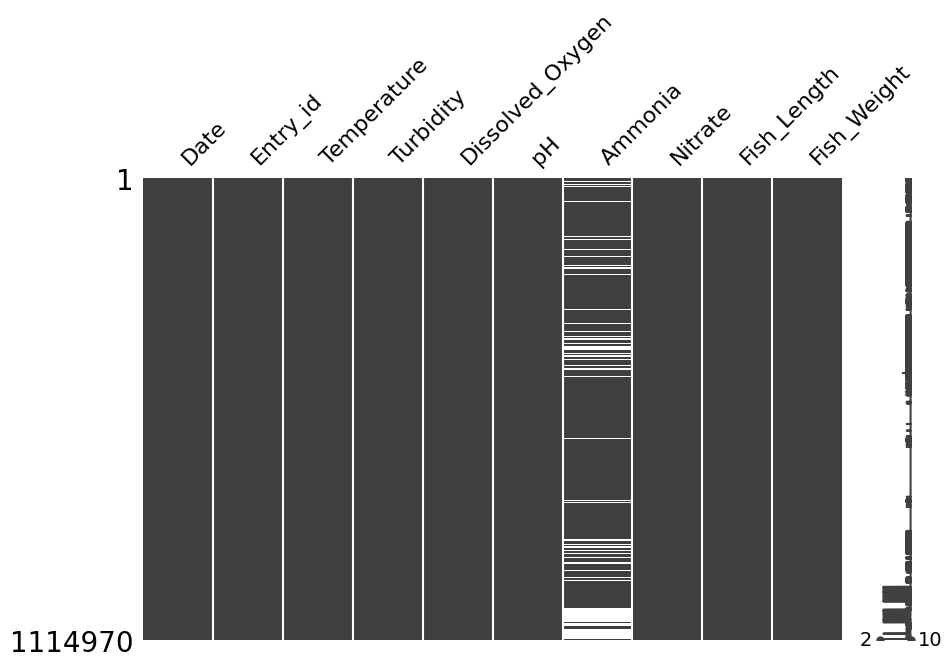

In [21]:
# Visualize missing data matrix
msno.matrix(df, figsize=(10, 6))

plt.show()

### Removing Duplicates values

In [22]:
def count_duplicate(df):
    # count number of duplicate values for each column in a given dataframe
    for col in df.columns:
        count = df[col].duplicated().sum()
        pct = round(df[col].duplicated().mean() * 100, 1)
        print(f'{col}: Duplicates: {count}, Percentage: {pct}%')
        
count_duplicate(df)
df.head()

Date: Duplicates: 219364, Percentage: 19.7%
Entry_id: Duplicates: 832943, Percentage: 74.7%
Temperature: Duplicates: 1114804, Percentage: 100.0%
Turbidity: Duplicates: 1114918, Percentage: 100.0%
Dissolved_Oxygen: Duplicates: 1097121, Percentage: 98.4%
pH: Duplicates: 1113427, Percentage: 99.9%
Ammonia: Duplicates: 1109757, Percentage: 99.5%
Nitrate: Duplicates: 1112403, Percentage: 99.8%
Fish_Length: Duplicates: 1114179, Percentage: 99.9%
Fish_Weight: Duplicates: 1114153, Percentage: 99.9%


,Date,Entry_id,Temperature,Turbidity,Dissolved_Oxygen,pH,Ammonia,Nitrate,Fish_Length,Fish_Weight
0,2021-01-07 00:00:08,24879.0,25.500,33.0,40.048,7.25792,NaN,418.0,12.205714,17.762857
1,2021-01-07 00:00:28,24880.0,25.500,33.0,40.048,7.25792,NaN,417.0,12.205714,17.762857
2,2021-01-07 00:00:37,22135.0,24.375,50.0,1.000,7.55753,33.07315,254.0,9.730000,11.400000
3,2021-01-07 00:00:47,24881.0,25.500,33.0,40.048,7.26700,NaN,417.0,12.205714,17.762857
4,2021-01-07 00:01:07,24882.0,25.500,34.0,40.048,7.27608,NaN,415.0,12.205714,17.762857


 Date column should be unique. There is no way to be duplicate or missing value in this column.

In [23]:
df = df.drop_duplicates(subset='Date')
print('Number of rows after removing duplicates:', 
      len(df) )
df.head()

Number of rows after removing duplicates: 895606


,Date,Entry_id,Temperature,Turbidity,Dissolved_Oxygen,pH,Ammonia,Nitrate,Fish_Length,Fish_Weight
0,2021-01-07 00:00:08,24879.0,25.500,33.0,40.048,7.25792,NaN,418.0,12.205714,17.762857
1,2021-01-07 00:00:28,24880.0,25.500,33.0,40.048,7.25792,NaN,417.0,12.205714,17.762857
2,2021-01-07 00:00:37,22135.0,24.375,50.0,1.000,7.55753,33.07315,254.0,9.730000,11.400000
3,2021-01-07 00:00:47,24881.0,25.500,33.0,40.048,7.26700,NaN,417.0,12.205714,17.762857
4,2021-01-07 00:01:07,24882.0,25.500,34.0,40.048,7.27608,NaN,415.0,12.205714,17.762857


In [24]:
def count_duplicate(df):
    # count number of duplicate values for each column in a given dataframe
    for col in df.columns:
        count = df[col].duplicated().sum()
        pct = round(df[col].duplicated().mean() * 100, 1)
        print(f'{col}: Duplicates: {count}, Percentage: {pct}%')
        
count_duplicate(df)
df.head()

Date: Duplicates: 0, Percentage: 0.0%
Entry_id: Duplicates: 617364, Percentage: 68.9%
Temperature: Duplicates: 895440, Percentage: 100.0%
Turbidity: Duplicates: 895554, Percentage: 100.0%
Dissolved_Oxygen: Duplicates: 877922, Percentage: 98.0%
pH: Duplicates: 894065, Percentage: 99.8%
Ammonia: Duplicates: 890423, Percentage: 99.4%
Nitrate: Duplicates: 893048, Percentage: 99.7%
Fish_Length: Duplicates: 894882, Percentage: 99.9%
Fish_Weight: Duplicates: 894855, Percentage: 99.9%


,Date,Entry_id,Temperature,Turbidity,Dissolved_Oxygen,pH,Ammonia,Nitrate,Fish_Length,Fish_Weight
0,2021-01-07 00:00:08,24879.0,25.500,33.0,40.048,7.25792,NaN,418.0,12.205714,17.762857
1,2021-01-07 00:00:28,24880.0,25.500,33.0,40.048,7.25792,NaN,417.0,12.205714,17.762857
2,2021-01-07 00:00:37,22135.0,24.375,50.0,1.000,7.55753,33.07315,254.0,9.730000,11.400000
3,2021-01-07 00:00:47,24881.0,25.500,33.0,40.048,7.26700,NaN,417.0,12.205714,17.762857
4,2021-01-07 00:01:07,24882.0,25.500,34.0,40.048,7.27608,NaN,415.0,12.205714,17.762857


### Removing Missing value checking

In [25]:
def count_nulls(df):
    # count number of null values for each column in a given dataframe
    count = df.isnull().sum()
    pct = round(df.isnull().mean() * 100, 1)
    null_values = pd.concat([count, pct], axis=1, keys=["count", "%"])
    print('Null values in the dataset:')
    print(null_values)

count_nulls(df)

Null values in the dataset:
                   count     %
Date                   1   0.0
Entry_id              30   0.0
Temperature           30   0.0
Turbidity             30   0.0
Dissolved_Oxygen      30   0.0
pH                    30   0.0
Ammonia           177438  19.8
Nitrate               30   0.0
Fish_Length            0   0.0
Fish_Weight            0   0.0


From the different books and different blogs we know that, If the missing values for specific columns less than 5% we can remove them which have no significant effect on the whole dataset. we can see that here in Ammonia Column hvae 19.8% missing values. So we will handle it in different way. 

In [26]:
# Drop rows with null values in all columns except 'Ammonia'
columns_to_check = [col for col in df.columns if col != 'Ammonia']
df.dropna(subset=columns_to_check, inplace=True)

In [27]:
def count_nulls(df):
    # count number of null values for each column in a given dataframe
    count = df.isnull().sum()
    pct = round(df.isnull().mean() * 100, 1)
    null_values = pd.concat([count, pct], axis=1, keys=["count", "%"])
    print('Null values in the dataset:')
    print(null_values)

count_nulls(df)

Null values in the dataset:
                   count     %
Date                   0   0.0
Entry_id               0   0.0
Temperature            0   0.0
Turbidity              0   0.0
Dissolved_Oxygen       0   0.0
pH                     0   0.0
Ammonia           177408  19.8
Nitrate                0   0.0
Fish_Length            0   0.0
Fish_Weight            0   0.0


As we can see that Ammonia have more than 5% missing values so we will interpolation this column using there previos values. but before that we need to see the overall dataframe and then we can decide should i need to do mean or median as a interpolation method.

In [28]:
# Add the binary indicator for missing values in Ammonia

df['Ammonia_missing'] = df['Ammonia'].isna().astype(int)

In [29]:
print(df.info())

df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 895576 entries, 0 to 1114968
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              895576 non-null  datetime64[ns]
 1   Entry_id          895576 non-null  float64       
 2   Temperature       895576 non-null  float64       
 3   Turbidity         895576 non-null  float64       
 4   Dissolved_Oxygen  895576 non-null  float64       
 5   pH                895576 non-null  float64       
 6   Ammonia           718168 non-null  float64       
 7   Nitrate           895576 non-null  float64       
 8   Fish_Length       895576 non-null  float64       
 9   Fish_Weight       895576 non-null  float64       
 10  Ammonia_missing   895576 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 82.0 MB
None


,Date,Entry_id,Temperature,Turbidity,Dissolved_Oxygen,pH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Ammonia_missing
count,895576,895576.000000,895576.000000,895576.000000,895576.000000,895576.000000,718168.000000,895576.000000,895576.000000,895576.000000,895576.000000
mean,2021-08-04 11:22:48.878878720,119502.773253,24.798061,37.829257,11.159336,6.051854,45.149986,813.139600,23.516215,170.233139,0.198094
min,2021-01-07 00:00:08,1.000000,10.000000,0.000000,1.000000,2.000000,0.001000,1.000000,6.740000,2.869286,0.000000
25%,2021-07-02 18:59:26.750000128,52217.000000,24.000000,31.000000,3.558000,4.461610,0.285620,295.000000,14.220000,27.080000,0.000000
50%,2021-07-30 14:43:13,113293.000000,24.687500,50.000000,6.543000,7.167130,2.351090,626.000000,18.140000,54.650000,0.000000
75%,2021-09-21 12:10:31.249999872,175356.000000,25.437500,50.000000,15.106000,7.471280,45.279830,1217.000000,32.140000,294.800000,0.000000
max,2022-02-07 00:00:00,282026.000000,31.687500,50.000000,44.980000,9.000000,200.000000,3870.000000,69.985714,1026.457143,1.000000
std,NaN,77491.179279,1.101436,16.726559,10.806846,2.118591,74.224711,629.475623,14.071742,223.403197,0.398563


In [30]:
display(df)

,Date,Entry_id,Temperature,Turbidity,Dissolved_Oxygen,pH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Ammonia_missing
0,2021-01-07 00:00:08,24879.0,25.5000,33.0,40.048,7.25792,NaN,418.0,12.205714,17.762857,1
1,2021-01-07 00:00:28,24880.0,25.5000,33.0,40.048,7.25792,NaN,417.0,12.205714,17.762857,1
2,2021-01-07 00:00:37,22135.0,24.3750,50.0,1.000,7.55753,33.07315,254.0,9.730000,11.400000,0
3,2021-01-07 00:00:47,24881.0,25.5000,33.0,40.048,7.26700,NaN,417.0,12.205714,17.762857,1
4,2021-01-07 00:01:07,24882.0,25.5000,34.0,40.048,7.27608,NaN,415.0,12.205714,17.762857,1
...,...,...,...,...,...,...,...,...,...,...,...
1114964,2022-02-03 00:00:00,744.0,27.1875,50.0,1.000,8.12950,0.00100,1066.0,32.460000,281.200000,0
1114965,2022-02-04 00:00:00,745.0,23.5000,50.0,1.000,7.53483,0.00100,1011.0,33.042860,302.971400,0
1114966,2022-02-05 00:00:00,746.0,25.2500,50.0,20.160,7.40319,0.00100,789.0,33.042860,302.971400,0
1114967,2022-02-06 00:00:00,747.0,25.1875,50.0,14.297,7.41227,0.00100,816.0,33.042860,302.971400,0


For plotting a histogram, the choice of the number of bins depends on the size of your dataset and the distribution of the data. A commonly used method to determine the optimal number of bins is Sturges’ formula, which is:


\text{Number of bins} = \lceil \log_2(n) + 1 \rceil


Where  n  is the number of data points.

Given your dataset size of 895576 rows, let’s calculate the number of bins using Sturges’ formula.

For a dataset size of  n = 895576 :

	1.	Calculate the logarithm base 2 of the dataset size:

\log_2(895576) \approx 19.8

	2.	Add 1 to the result:

19.8 + 1 = 20.8

	3.	Round up to the nearest whole number:

\text{Number of bins} = \lceil 20.8 \rceil = 21


So, 19 bins would be a good starting point for visualizing your histogram.


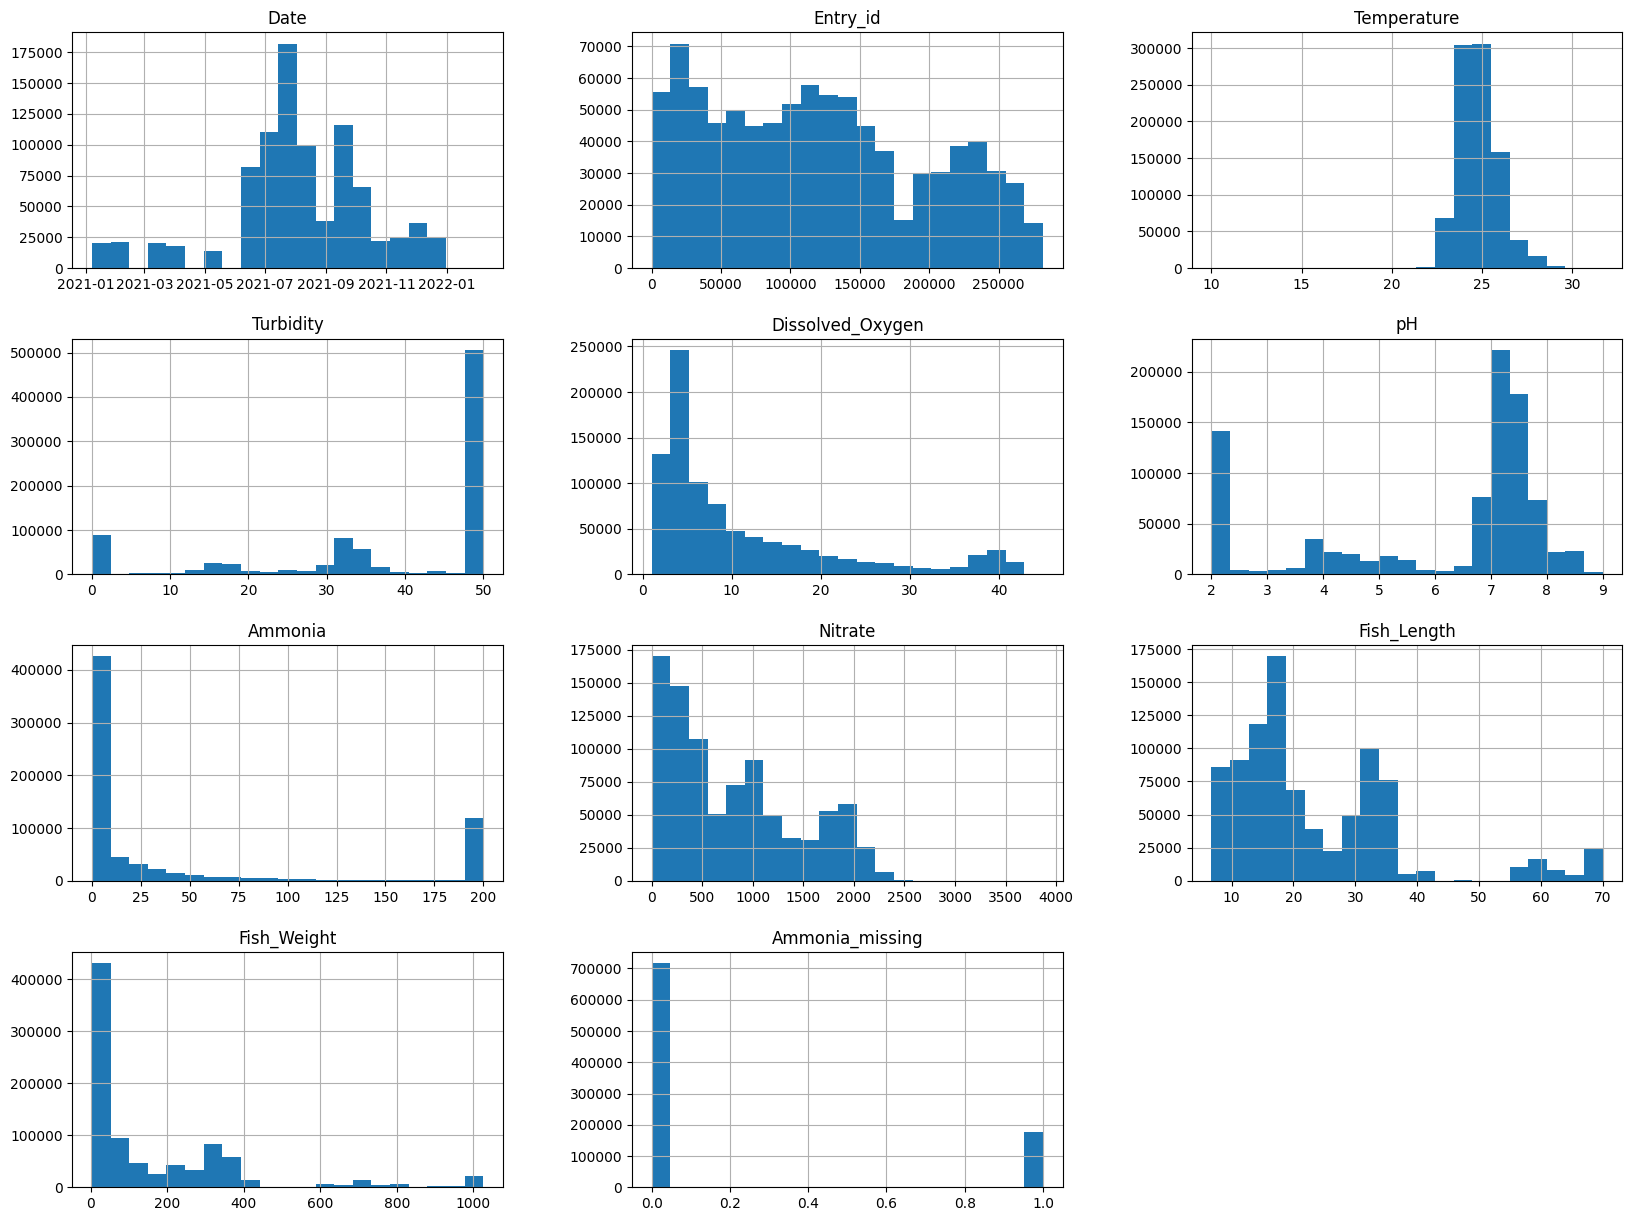

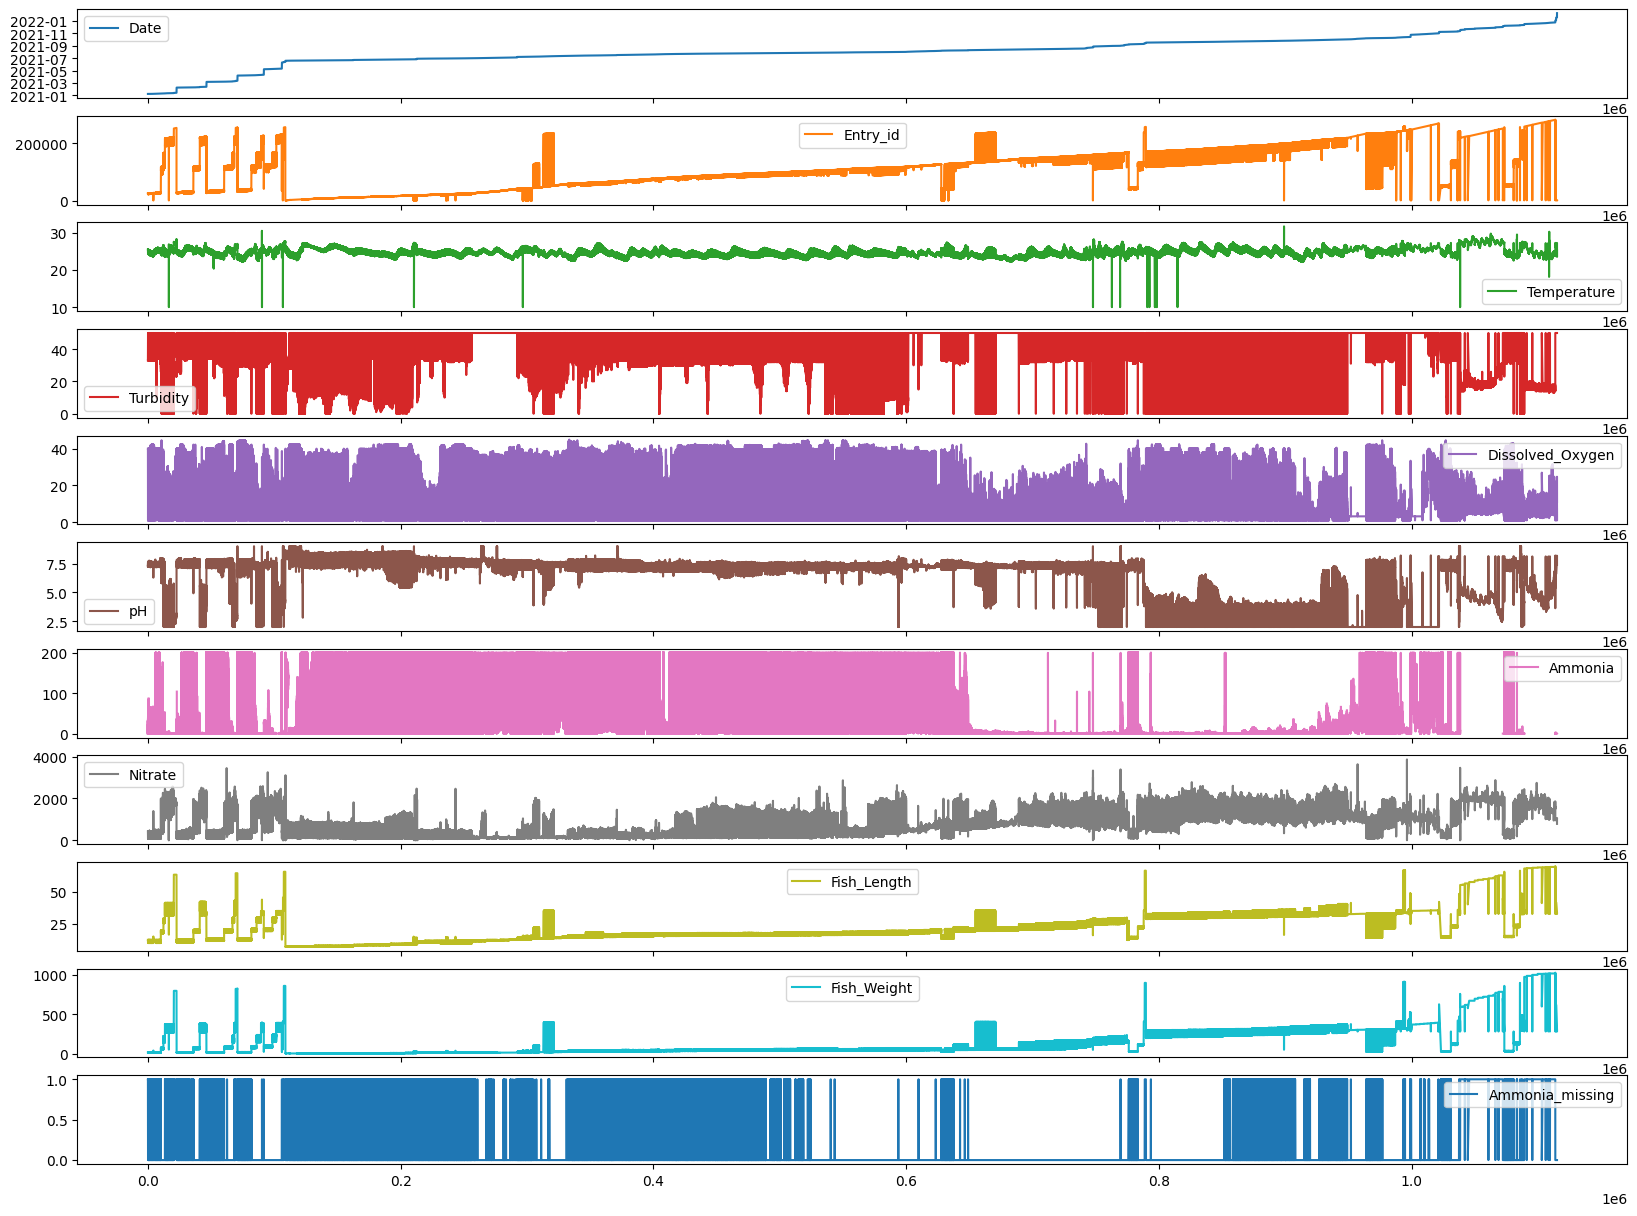

In [31]:
# Plotting the distributions of each feature
df.hist(bins=21, figsize=(20, 15))
plt.show()

# Plotting the time series data
df.plot(subplots=True, figsize=(20, 15))
plt.show()

After checking duplicate values and removing duplicate values from Date column and also checking missing and remove them Entry_id need to be sort again. 

In [32]:
# Step 1: Sort the DataFrame by the 'Date' column
df = df.sort_values(by='Date').reset_index(drop=True)

# Step 2: Reassign the 'Entry_id' to match the sorted order
df['Entry_id'] = range(1, len(df) + 1)


In [33]:
df

,Date,Entry_id,Temperature,Turbidity,Dissolved_Oxygen,pH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Ammonia_missing
0,2021-01-07 00:00:08,1,25.5000,33.0,40.048,7.25792,NaN,418.0,12.205714,17.762857,1
1,2021-01-07 00:00:28,2,25.5000,33.0,40.048,7.25792,NaN,417.0,12.205714,17.762857,1
2,2021-01-07 00:00:37,3,24.3750,50.0,1.000,7.55753,33.07315,254.0,9.730000,11.400000,0
3,2021-01-07 00:00:47,4,25.5000,33.0,40.048,7.26700,NaN,417.0,12.205714,17.762857,1
4,2021-01-07 00:01:07,5,25.5000,34.0,40.048,7.27608,NaN,415.0,12.205714,17.762857,1
...,...,...,...,...,...,...,...,...,...,...,...
895571,2022-02-03 00:00:00,895572,27.1875,50.0,1.000,8.12950,0.00100,1066.0,32.460000,281.200000,0
895572,2022-02-04 00:00:00,895573,23.5000,50.0,1.000,7.53483,0.00100,1011.0,33.042860,302.971400,0
895573,2022-02-05 00:00:00,895574,25.2500,50.0,20.160,7.40319,0.00100,789.0,33.042860,302.971400,0
895574,2022-02-06 00:00:00,895575,25.1875,50.0,14.297,7.41227,0.00100,816.0,33.042860,302.971400,0


In [34]:
df.describe()

,Date,Entry_id,Temperature,Turbidity,Dissolved_Oxygen,pH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Ammonia_missing
count,895576,895576.000000,895576.000000,895576.000000,895576.000000,895576.000000,718168.000000,895576.000000,895576.000000,895576.000000,895576.000000
mean,2021-08-04 11:22:48.878878720,447788.500000,24.798061,37.829257,11.159336,6.051854,45.149986,813.139600,23.516215,170.233139,0.198094
min,2021-01-07 00:00:08,1.000000,10.000000,0.000000,1.000000,2.000000,0.001000,1.000000,6.740000,2.869286,0.000000
25%,2021-07-02 18:59:26.750000128,223894.750000,24.000000,31.000000,3.558000,4.461610,0.285620,295.000000,14.220000,27.080000,0.000000
50%,2021-07-30 14:43:13,447788.500000,24.687500,50.000000,6.543000,7.167130,2.351090,626.000000,18.140000,54.650000,0.000000
75%,2021-09-21 12:10:31.249999872,671682.250000,25.437500,50.000000,15.106000,7.471280,45.279830,1217.000000,32.140000,294.800000,0.000000
max,2022-02-07 00:00:00,895576.000000,31.687500,50.000000,44.980000,9.000000,200.000000,3870.000000,69.985714,1026.457143,1.000000
std,NaN,258530.666677,1.101436,16.726559,10.806846,2.118591,74.224711,629.475623,14.071742,223.403197,0.398563


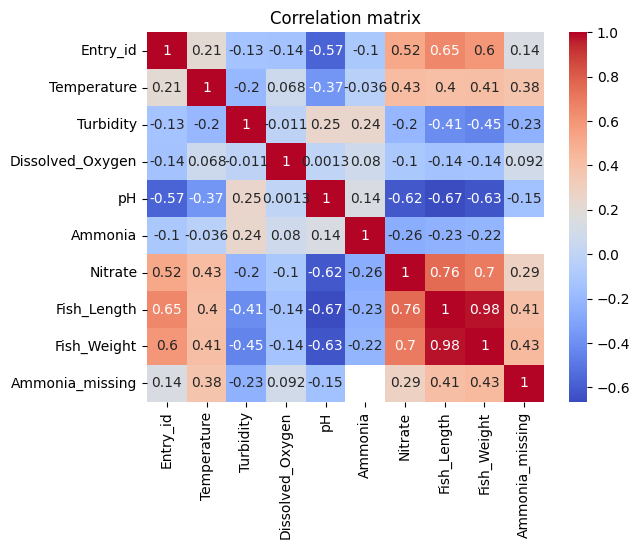

In [35]:
df_corr=df.drop("Date",axis=1)

# Calculate the correlation matrix
corr = df_corr.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

#Add the title to my heatmap 

plt.title('Correlation matrix')
plt.show()

### Visual Analysis For ammonia missing values

    Plot missing data patterns or heatmaps to see if there is any apparent structure to the missing data.

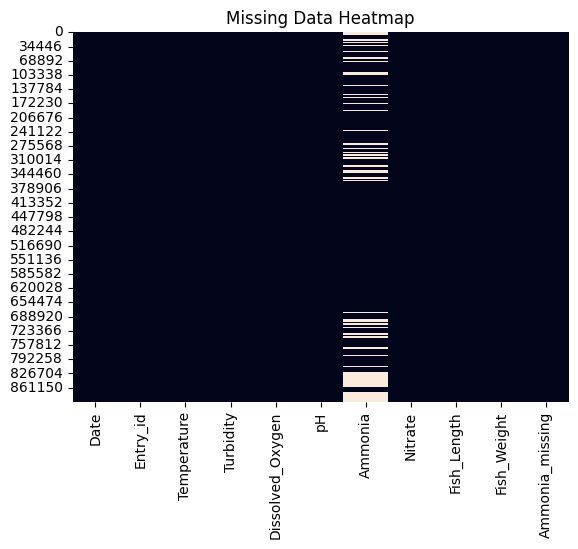

In [36]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

Fro the visualiation we can't say is it MCAR or MNAR!! 

### Correlation Analysis:
    Check for correlations between missingness and other variables. High correlation might suggest MAR.

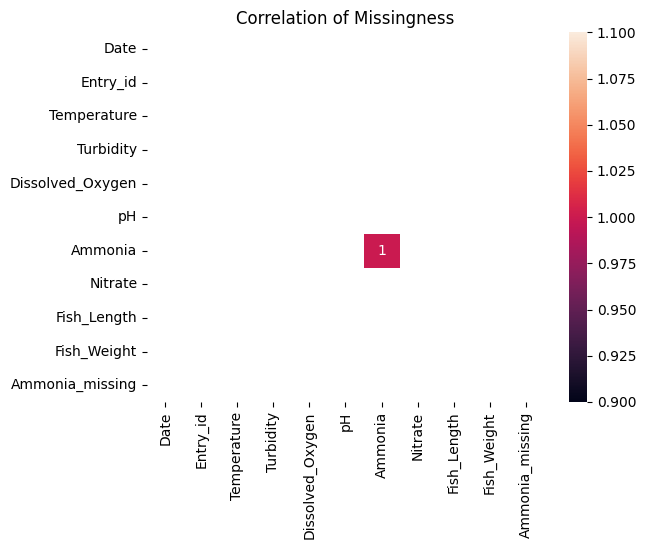

In [37]:
missing_corr = df.isnull().corr()
sns.heatmap(missing_corr, annot=True)
plt.title("Correlation of Missingness")
plt.show()

From this correlation we can say that its not MAR as there is no correlation between other variables. 

In [38]:
import scipy.stats as stats

# Separate data with and without missing Ammonia values
with_missing = df[df['Ammonia'].isna()]
without_missing = df[df['Ammonia'].notna()]

# Example: Compare Temperature distributions
t_stat, p_value = stats.ttest_ind(with_missing['Temperature'].dropna(), without_missing['Temperature'].dropna(), equal_var=False)

print(f"T-test p-value for Temperature: {p_value}")

T-test p-value for Temperature: 0.0


In [39]:
for column in ['pH', 'Dissolved_Oxygen', 'Turbidity']:  # Add other relevant features
    t_stat, p_value = stats.ttest_ind(with_missing[column].dropna(), without_missing[column].dropna(), equal_var=False)
    print(f"T-test p-value for {column}: {p_value}")

T-test p-value for pH: 0.0
T-test p-value for Dissolved_Oxygen: 0.0
T-test p-value for Turbidity: 0.0


### Further visualiaztion analysis

In [40]:
df.set_index('Date', inplace=True)


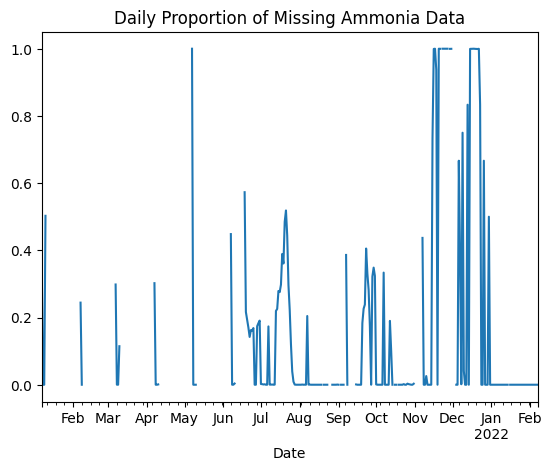

In [41]:
# Plot missing data over time
df['Ammonia_missing'] = df['Ammonia'].isna().astype(int)
df['Ammonia_missing'].resample('D').mean().plot()  # Daily mean of missingness
plt.title("Daily Proportion of Missing Ammonia Data")
plt.show()

### Analysis of the Visualization:

	1.	Temporal Clustering:
	•	There are clear periods where the proportion of missing data spikes dramatically, particularly in late November through December and other intermittent periods.
	•	The presence of missing data seems to occur in clusters or specific periods rather than being randomly distributed over time.
	2.	High Proportion of Missing Data:
	•	During some periods, the proportion of missing data approaches 100%, which suggests that the sensor or system might have been consistently failing or turned off during those times.

Implications:

	•	Potential MNAR:
	•	The fact that missingness occurs in distinct, non-random clusters suggests that the missing data might be MNAR (Missing Not at Random). For example, the sensor could be failing under specific conditions, such as high ammonia levels or other environmental factors that are not being directly measured.
	•	Periods of Consistent Missingness:
	•	The periods where almost all data is missing could indicate systematic issues like maintenance periods, equipment failures, or environmental factors that are not being directly measured but could correlate with high ammonia levels.


In [42]:
# Reset the index, converting the Date index back to a column
df.reset_index(inplace=True)

#### Extract Time-Related Features

In [43]:
# Ensure Date is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month, quarter, and season from Date
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Season'] = df['Date'].dt.month % 12 // 3 + 1  # 1: Winter, 2: Spring, 3: Summer, 4: Fall

# Create a binary indicator for missing Ammonia values
df['Ammonia_missing'] = df['Ammonia'].isna().astype(int)

#### Aggregate Missing Data by These Features

In [44]:
# Aggregate by Month
missing_by_month = df.groupby('Month')['Ammonia_missing'].mean()

# Aggregate by Season
missing_by_season = df.groupby('Season')['Ammonia_missing'].mean()

# Aggregate by Quarter
missing_by_quarter = df.groupby('Quarter')['Ammonia_missing'].mean()

#### Visualize and Analyze:

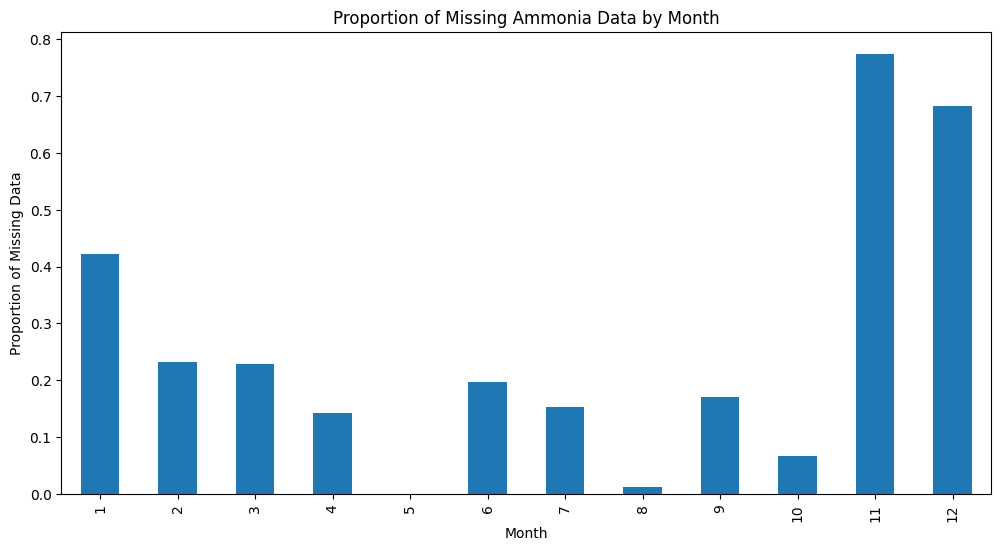

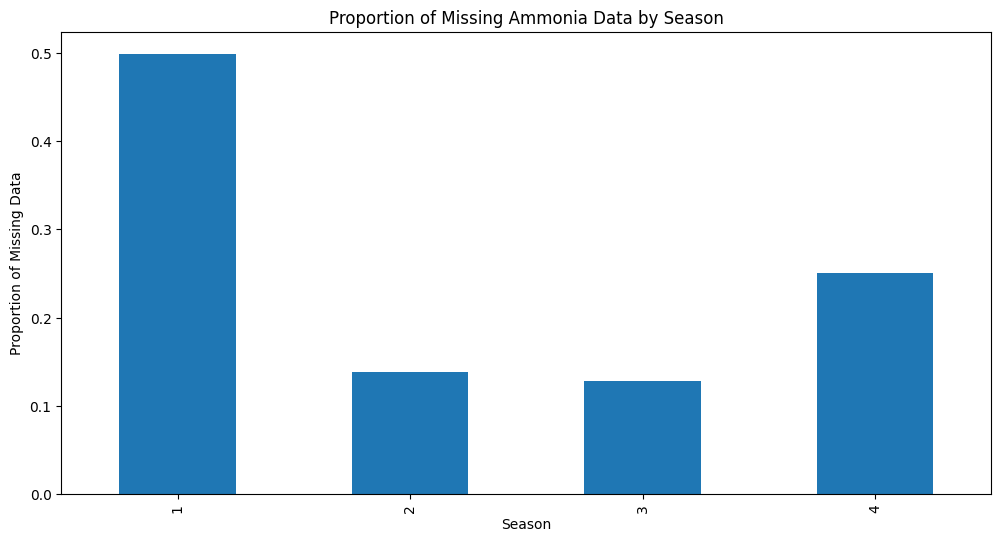

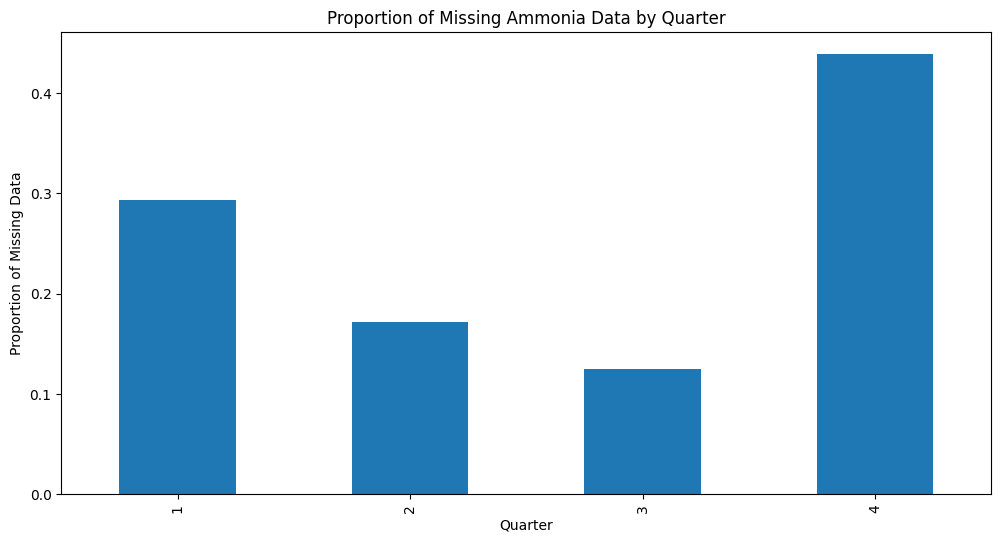

In [45]:
# Plot Missing Data by Month
plt.figure(figsize=(12, 6))
missing_by_month.plot(kind='bar')
plt.title("Proportion of Missing Ammonia Data by Month")
plt.ylabel("Proportion of Missing Data")
plt.xlabel("Month")
plt.show()

# Plot Missing Data by Season
plt.figure(figsize=(12, 6))
missing_by_season.plot(kind='bar')
plt.title("Proportion of Missing Ammonia Data by Season")
plt.ylabel("Proportion of Missing Data")
plt.xlabel("Season")
plt.show()

# Plot Missing Data by Quarter
plt.figure(figsize=(12, 6))
missing_by_quarter.plot(kind='bar')
plt.title("Proportion of Missing Ammonia Data by Quarter")
plt.ylabel("Proportion of Missing Data")
plt.xlabel("Quarter")
plt.show()

### Analysis of the Plots:

#### 1.	Proportion of Missing Ammonia Data by Month:
	•	Observations:
	•	High Missing Proportion: November and December show the highest proportions of missing Ammonia data, with nearly 80% of the data missing in November.
	•	Significant Drops in Summer: June, July, and August (typical summer months) have very low proportions of missing data, suggesting fewer issues with data collection during this period.
	•	Winter Months: January and February also show higher proportions of missing data, though not as extreme as November and December.
	•	Implications:
	•	The clear pattern of higher missing data in winter months (especially November and December) suggests that environmental factors, likely related to colder weather, could be influencing the sensor’s ability to record ammonia levels, or possibly, operational issues during these times.
#### 2.	Proportion of Missing Ammonia Data by Season:
	•	Observations:
	•	Winter (Season 1): Has the highest proportion of missing data, around 50%.
	•	Spring (Season 2) and Summer (Season 3): Both show significantly lower missing proportions, indicating fewer issues with data collection during warmer seasons.
	•	Fall (Season 4): There is a noticeable increase again, though not as extreme as winter.
	•	Implications:
	•	The seasonal analysis reinforces the monthly findings, suggesting that colder weather conditions in the winter (and potentially late fall) are strongly associated with higher rates of missing data. This could indicate MNAR, where the missingness is related to the environmental conditions that affect the sensors.
#### 3.	Proportion of Missing Ammonia Data by Quarter:
	•	Observations:
	•	Q4 (October to December): Shows the highest proportion of missing data, aligning with the high missing rates observed in November and December.
	•	Q1 (January to March): Also shows a significant amount of missing data, though less than Q4.
	•	Q2 and Q3 (April to September): Have much lower missing proportions, reinforcing that these quarters face fewer issues with missing data.
	•	Implications:
	•	This quarterly analysis further supports the notion that the missing data is more likely during the colder months, particularly in the late fall and winter (Q4 and Q1). This pattern is consistent with the potential for MNAR data, where certain environmental conditions or operational challenges in these periods lead to higher rates of missing data.


### Overall Conclusion:

Key Points:

#### 1.
	•	The t-test results showing a p-value of 0 for all comparisons between Ammonia and other variables like Temperature, Oxygen, pH, Nitrate, etc., is likely because these variables are fully observed and the missingness in Ammonia is related to specific periods where the ammonia sensor failed.
#### 2.	
	•	The visualizations you created show clear temporal patterns where Ammonia data is missing, particularly in specific months, seasons, or quarters. This pattern strongly suggests that the sensor was non-functional during these periods, leading to missing data, while other sensors continued to operate correctly.
	•	This supports the idea that the missingness is MNAR (Missing Not at Random) because it’s related to external factors like sensor failure during specific environmental conditions or operational issues.
#### 3.	
	•	Sensor Replacement and Downtime: The fact that only the Ammonia sensor has missing data suggests that it was likely malfunctioning or required replacement, which took time. During this downtime, no ammonia data was recorded, but other sensors continued to function normally.
	•	Impact of Specific Conditions: The missing data may correspond to periods of extreme conditions (e.g., very cold or very hot weather) that affected only the Ammonia sensor, while others were unaffected.


In [46]:
# Check skewness of the 'Ammonia' column
ammonia_skewness = skew(df['Ammonia'].dropna())
print(f'Skewness of Ammonia: {ammonia_skewness}')


Skewness of Ammonia: 1.447909611051746


Why Iterative Imputation (MICE)?

	•	Iterative Imputation models each feature with missing values as a function of the other features, making it well-suited for handling MNAR data. It allows the imputation to be informed by other variables like Temperature, Oxygen, etc.
	•	Respecting Skewness: Since Ammonia is right-skewed, this method can better handle the distribution than simpler imputation methods like mean imputation.
    

## Identify Large Gaps:
•	Calculate the time differences between consecutive entries and flag periods with large gaps.

•	Add a Large_Gap column to indicate periods with large gaps.


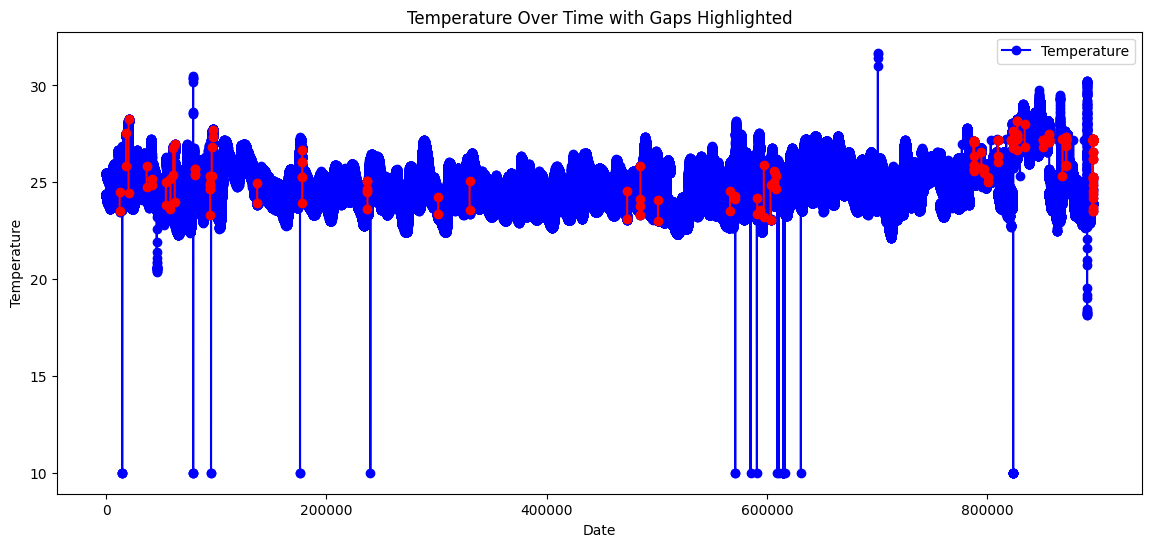

In [47]:
# Calculate time differences to identify gaps
df['time_diff'] = df['Date'].diff().dt.total_seconds()

# Define a threshold for what you consider a "gap"
gap_threshold = 4 * 3600  # 4 hours in seconds

# Create a mask to identify gaps
gaps = df['time_diff'] > gap_threshold

plt.figure(figsize=(14, 6))

# Plot the temperature data with blue dots and lines
plt.plot(df.index, df['Temperature'], 'bo-', label='Temperature')

# Highlight gaps in red
for i in range(1, len(df)):
    if gaps.iloc[i]:
        plt.plot(df.index[i-1:i+1], df['Temperature'].iloc[i-1:i+1], 'ro-', label='Gap' if i == 1 else "")

plt.title('Temperature Over Time with Gaps Highlighted')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [48]:
# Calculate the time differences between consecutive entries
df['time_diff'] = df["Date"].diff().dropna()

# Get the top 5 maximum time differences
top_5_diffs = df.nlargest(5, 'time_diff')

# Print the top 5 maximum differences
print("Top 5 maximum time differences:\n", top_5_diffs[['Date', 'time_diff']])

# Get the positional indices of the top 5 maximum differences
indices = top_5_diffs.index

# Extract rows before, during, and after the top 5 differences
for idx in indices:
    # Find the positional index of the current row
    pos_idx = df.index.get_loc(idx)
    
    # Get the range for before, current, and after rows
    start_idx = max(0, pos_idx - 1)  # Ensure index doesn't go below 0
    end_idx = min(len(df), pos_idx + 2)  # Ensure index doesn't go beyond the dataframe length
    
    # Print the relevant rows using iloc
    display(f"\nRows around the top difference at positional index {pos_idx}:")
    display(df.iloc[start_idx:end_idx])

Top 5 maximum time differences:
                      Date        time_diff
94311 2021-06-07 13:03:03 27 days 13:03:20
80399 2021-05-07 19:08:17 26 days 19:08:31
62218 2021-04-07 00:00:05 25 days 11:53:03
20266 2021-02-07 00:00:00 25 days 10:06:35
41571 2021-03-07 00:00:11 24 days 00:01:19


'\nRows around the top difference at positional index 94311:'

,Date,Entry_id,Temperature,Turbidity,Dissolved_Oxygen,pH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Ammonia_missing,Month,Quarter,Season,time_diff
94310,2021-05-10 23:59:43,94311,25.3125,0.0,2.667,5.42852,0.00262,1133.0,34.834286,389.828571,0,5,2,2,0 days 00:00:19
94311,2021-06-07 13:03:03,94312,24.9375,50.0,15.797,7.77088,200.00000,527.0,12.390000,20.760000,0,6,2,3,27 days 13:03:20
94312,2021-06-07 14:55:03,94313,24.7500,50.0,3.558,7.81174,200.00000,464.0,12.390000,20.760000,0,6,2,3,0 days 01:52:00


'\nRows around the top difference at positional index 80399:'

,Date,Entry_id,Temperature,Turbidity,Dissolved_Oxygen,pH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Ammonia_missing,Month,Quarter,Season,time_diff
80398,2021-04-10 23:59:46,80399,25.3750,0.0,3.123,5.47845,0.001,1281.0,34.712857,385.385714,0,4,2,2,0 days 00:00:20
80399,2021-05-07 19:08:17,80400,25.6875,33.0,1.000,7.04911,NaN,429.0,13.585714,23.171429,1,5,2,2,26 days 19:08:31
80400,2021-05-08 00:00:01,80401,25.4375,50.0,5.150,7.56661,0.001,1961.0,21.400000,103.200000,0,5,2,2,0 days 04:51:44


'\nRows around the top difference at positional index 62218:'

,Date,Entry_id,Temperature,Turbidity,Dissolved_Oxygen,pH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Ammonia_missing,Month,Quarter,Season,time_diff
62217,2021-03-12 12:07:02,62218,27.0000,50.0,16.067,9.00000,0.55934,1.0,50.701429,825.971429,0,3,1,2,0 days 00:00:19
62218,2021-04-07 00:00:05,62219,24.0000,50.0,7.480,7.82536,200.00000,470.0,12.010000,16.320000,0,4,2,2,25 days 11:53:03
62219,2021-04-07 00:00:08,62220,23.6875,26.0,27.754,7.68009,0.00109,313.0,11.751429,15.257143,0,4,2,2,0 days 00:00:03


'\nRows around the top difference at positional index 20266:'

,Date,Entry_id,Temperature,Turbidity,Dissolved_Oxygen,pH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Ammonia_missing,Month,Quarter,Season,time_diff
20265,2021-01-12 13:53:25,20266,28.2500,24.0,15.915,3.17695,NaN,1761.0,63.252857,796.414286,1,1,1,1,0 days 00:00:28
20266,2021-02-07 00:00:00,20267,24.4375,50.0,31.205,7.59838,0.76916,96.0,11.047143,12.051429,0,2,1,1,25 days 10:06:35
20267,2021-02-07 00:00:16,20268,25.5625,35.0,40.048,7.21707,NaN,422.0,12.652857,18.981429,1,2,1,1,0 days 00:00:16


'\nRows around the top difference at positional index 41571:'

,Date,Entry_id,Temperature,Turbidity,Dissolved_Oxygen,pH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Ammonia_missing,Month,Quarter,Season,time_diff
41570,2021-02-10 23:58:52,41571,25.1875,0.0,3.468,5.38313,0.00100,1341.0,34.47,376.5,0,2,1,1,0 days 00:07:34
41571,2021-03-07 00:00:11,41572,24.8750,50.0,9.227,7.55753,0.29124,95.0,11.34,12.6,0,3,1,2,24 days 00:01:19
41572,2021-03-07 00:00:12,41573,26.0000,35.0,38.075,7.16260,NaN,407.0,13.10,20.2,1,3,1,2,0 days 00:00:01


In [49]:
# Set 'Date' as the index
df.set_index('Date', inplace=True)


In [50]:
# Create a copy of the original dataframe
df_resampled = df.copy()

In [51]:
# Define a threshold for large gaps (e.g., 4 hours)
large_gap_threshold = pd.Timedelta(hours=0.5)

# Create a boolean mask for large gaps
df_resampled['Large_Gap'] = df_resampled['time_diff'] > large_gap_threshold

In [52]:
# Drop the 'time_diff' column as it's no longer needed
df_resampled.drop(columns=['time_diff'], inplace=True)

In [53]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 895576 entries, 2021-01-07 00:00:08 to 2022-02-07 00:00:00
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Entry_id          895576 non-null  int64  
 1   Temperature       895576 non-null  float64
 2   Turbidity         895576 non-null  float64
 3   Dissolved_Oxygen  895576 non-null  float64
 4   pH                895576 non-null  float64
 5   Ammonia           718168 non-null  float64
 6   Nitrate           895576 non-null  float64
 7   Fish_Length       895576 non-null  float64
 8   Fish_Weight       895576 non-null  float64
 9   Ammonia_missing   895576 non-null  int64  
 10  Month             895576 non-null  int32  
 11  Quarter           895576 non-null  int32  
 12  Season            895576 non-null  int32  
 13  Large_Gap         895576 non-null  bool   
dtypes: bool(1), float64(8), int32(3), int64(2)
memory usage: 86.3 MB


Here, we’ll also add the general_missing column, which will be 0 for original data and 1 for newly created data.
Set the Ammonia_missing indicator for resampled rows to 0, as they are newly created and should not be confused with the original missing values in the Ammonia column.


In [54]:
# Create an empty DataFrame to hold the final resampled data
final_df = pd.DataFrame()

In [55]:
# Create a list to store the resampled and original data
df_list = []


# Iterate over the DataFrame to apply selective resampling
for i in range(1, len(df_resampled)):
    if df_resampled['Large_Gap'].iloc[i]:
        start_time = df_resampled.index[i-1]
        end_time = df_resampled.index[i]
        
        # Create a time range with 5-minute intervals within the large gap
        resampled_range = pd.date_range(start=start_time, end=end_time, freq='5T')[1:-1]
        
        # Create a DataFrame with NaNs for the resampling period
        resampled_df = pd.DataFrame(index=resampled_range)
        resampled_df = resampled_df.reindex(columns=df_resampled.columns)
        resampled_df['Large_Gap'] = True  # Flag these as artificially created
        
        # Ensure the 'Ammonia_missing' column for resampled data is set to 0
        resampled_df['Ammonia_missing'] = 0
        
        # Add a general missing indicator column for resampled rows
        resampled_df['general_missing'] = 1
        
        # Add the resampled DataFrame to the list
        df_list.append(resampled_df)
        
    # Always add the original data point to the list
    original_data = df_resampled.iloc[i:i+1].copy()
    original_data['general_missing'] = 0  # Mark original data as not missing
    df_list.append(original_data)


In [56]:
# Concatenate all parts together into a final DataFrame
final_df = pd.concat(df_list).sort_index()


In [57]:
final_df

,Entry_id,Temperature,Turbidity,Dissolved_Oxygen,pH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Ammonia_missing,Month,Quarter,Season,Large_Gap,general_missing
2021-01-07 00:00:28,2.0,25.500,33.0,40.048,7.25792,NaN,417.0,12.205714,17.762857,1,1.0,1.0,1.0,False,0
2021-01-07 00:00:37,3.0,24.375,50.0,1.000,7.55753,33.07315,254.0,9.730000,11.400000,0,1.0,1.0,1.0,False,0
2021-01-07 00:00:47,4.0,25.500,33.0,40.048,7.26700,NaN,417.0,12.205714,17.762857,1,1.0,1.0,1.0,False,0
2021-01-07 00:01:07,5.0,25.500,34.0,40.048,7.27608,NaN,415.0,12.205714,17.762857,1,1.0,1.0,1.0,False,0
2021-01-07 00:01:21,6.0,24.375,50.0,9.227,7.61654,0.58460,94.0,10.754286,11.502857,0,1.0,1.0,1.0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-06 23:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,True,1
2022-02-06 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,True,1
2022-02-06 23:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,True,1
2022-02-06 23:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,True,1


In [58]:
# Reset the index and clean up columns
final_df.reset_index(drop=False, inplace=True)
final_df.rename(columns={'index': 'Date'}, inplace=True)

In [59]:
final_df

,Date,Entry_id,Temperature,Turbidity,Dissolved_Oxygen,pH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Ammonia_missing,Month,Quarter,Season,Large_Gap,general_missing
0,2021-01-07 00:00:28,2.0,25.500,33.0,40.048,7.25792,NaN,417.0,12.205714,17.762857,1,1.0,1.0,1.0,False,0
1,2021-01-07 00:00:37,3.0,24.375,50.0,1.000,7.55753,33.07315,254.0,9.730000,11.400000,0,1.0,1.0,1.0,False,0
2,2021-01-07 00:00:47,4.0,25.500,33.0,40.048,7.26700,NaN,417.0,12.205714,17.762857,1,1.0,1.0,1.0,False,0
3,2021-01-07 00:01:07,5.0,25.500,34.0,40.048,7.27608,NaN,415.0,12.205714,17.762857,1,1.0,1.0,1.0,False,0
4,2021-01-07 00:01:21,6.0,24.375,50.0,9.227,7.61654,0.58460,94.0,10.754286,11.502857,0,1.0,1.0,1.0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969799,2022-02-06 23:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,True,1
969800,2022-02-06 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,True,1
969801,2022-02-06 23:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,True,1
969802,2022-02-06 23:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,True,1


In [60]:
final_df['Entry_id'] = range(1, len(final_df) + 1)

In [61]:
final_df

,Date,Entry_id,Temperature,Turbidity,Dissolved_Oxygen,pH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Ammonia_missing,Month,Quarter,Season,Large_Gap,general_missing
0,2021-01-07 00:00:28,1,25.500,33.0,40.048,7.25792,NaN,417.0,12.205714,17.762857,1,1.0,1.0,1.0,False,0
1,2021-01-07 00:00:37,2,24.375,50.0,1.000,7.55753,33.07315,254.0,9.730000,11.400000,0,1.0,1.0,1.0,False,0
2,2021-01-07 00:00:47,3,25.500,33.0,40.048,7.26700,NaN,417.0,12.205714,17.762857,1,1.0,1.0,1.0,False,0
3,2021-01-07 00:01:07,4,25.500,34.0,40.048,7.27608,NaN,415.0,12.205714,17.762857,1,1.0,1.0,1.0,False,0
4,2021-01-07 00:01:21,5,24.375,50.0,9.227,7.61654,0.58460,94.0,10.754286,11.502857,0,1.0,1.0,1.0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969799,2022-02-06 23:40:00,969800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,True,1
969800,2022-02-06 23:45:00,969801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,True,1
969801,2022-02-06 23:50:00,969802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,True,1
969802,2022-02-06 23:55:00,969803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,True,1


### Split the dataset

it’s better practice to split the dataset into training and testing sets before performing imputation. This approach ensures that the model’s performance evaluation is realistic because the test data remains unseen during the imputation process, preventing data leakage.

For my project involves anomaly detection based on IoT sensor data, which is likely dealing with an unsupervised approach. Here’s how might proceed:

1. Unsupervised Anomaly Detection:

	•	Use All Relevant Features: For anomaly detection,  typically use all the relevant features (X) that might indicate an anomaly. This might include columns like Temperature, Turbidity, Dissolved_Oxygen, pH, etc.
	•	No y: There’s no need for a target variable (y) since the model will learn to detect outliers or anomalies based on the input features alone.
    
    
Purpose: Splitting the data ensures that it can train anomaly detection model on one part of the data (the training set) and then evaluate its performance on the other part (the test set).


Outcome: This will help to understand how well the model generalizes to new, unseen data, which is crucial in anomaly detection.


In [62]:
# Set 'Date' as the index
final_df.set_index('Date', inplace=True)

In [63]:
# Select the features for your model
X = final_df[['Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate', 'Ammonia', 'Ammonia_missing', 'Large_Gap', 'general_missing']]

# Split the data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42, shuffle=False)

In [64]:
X_train.shape, X_test.shape

((678862, 9), (290942, 9))

In [65]:
display(X_train)

,Temperature,Turbidity,Dissolved_Oxygen,pH,Nitrate,Ammonia,Ammonia_missing,Large_Gap,general_missing
Date,,,,,,,,,
2021-01-07 00:00:28,25.5000,33.0,40.048,7.25792,417.0,NaN,1,False,0
2021-01-07 00:00:37,24.3750,50.0,1.000,7.55753,254.0,33.07315,0,False,0
2021-01-07 00:00:47,25.5000,33.0,40.048,7.26700,417.0,NaN,1,False,0
2021-01-07 00:01:07,25.5000,34.0,40.048,7.27608,415.0,NaN,1,False,0
2021-01-07 00:01:21,24.3750,50.0,9.227,7.61654,94.0,0.58460,0,False,0
...,...,...,...,...,...,...,...,...,...
2021-09-17 05:58:11,25.1875,36.0,40.048,2.00000,1778.0,1.38119,0,False,0
2021-09-17 05:58:12,23.7500,0.0,6.088,3.74892,992.0,1.89345,0,False,0
2021-09-17 05:58:23,24.8750,50.0,6.787,2.41885,2026.0,0.00135,0,False,0


In [66]:
display(X_test)

,Temperature,Turbidity,Dissolved_Oxygen,pH,Nitrate,Ammonia,Ammonia_missing,Large_Gap,general_missing
Date,,,,,,,,,
2021-09-17 05:58:31,23.7500,0.0,6.088,3.74892,983.0,1.87232,0,False,0
2021-09-17 05:58:42,24.8750,50.0,7.285,2.42339,2020.0,0.00128,0,False,0
2021-09-17 05:58:48,24.3750,0.0,20.801,2.00000,934.0,0.00104,0,False,0
2021-09-17 05:58:49,23.9375,50.0,5.080,4.04852,442.0,0.00100,0,False,0
2021-09-17 05:58:51,23.7500,0.0,5.927,3.74438,899.0,1.94366,0,False,0
...,...,...,...,...,...,...,...,...,...
2022-02-06 23:40:00,NaN,NaN,NaN,NaN,NaN,NaN,0,True,1
2022-02-06 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,0,True,1
2022-02-06 23:50:00,NaN,NaN,NaN,NaN,NaN,NaN,0,True,1


Use IterativeImputer to fill the missing values in the resampled data, excluding the original Ammonia missing values identified by your Ammonia_missing binary indicator.

In [67]:
# Exclude rows where 'Ammonia_missing' is True for Ammonia imputation
X_train_no_original_ammonia = X_train[X_train['Ammonia_missing'] == 0]
X_test_no_original_ammonia = X_test[X_test['Ammonia_missing'] == 0]

# Drop indicator columns before imputation
columns_to_impute = X_train_no_original_ammonia.columns.drop(['Ammonia_missing', 'general_missing', 'Large_Gap'])


In [68]:
print(X_train_no_original_ammonia.shape)
print(X_test_no_original_ammonia.shape)

(590880, 9)
(201517, 9)


In [69]:
# Initialize the Iterative Imputer
imputer = IterativeImputer(max_iter=10, random_state=0, imputation_order='ascending')

In [70]:
# Step 2: Fit the imputer on X_train and transform X_train
X_train_no_original_ammonia_imputed = imputer.fit_transform(X_train_no_original_ammonia[columns_to_impute])

In [71]:
# Transform X_test using the fitted imputer
X_test_no_original_ammonia_imputed  = imputer.transform(X_test_no_original_ammonia[columns_to_impute])

In [72]:
# Convert the results back to DataFrames with the same columns
X_train_no_original_ammonia_imputed = pd.DataFrame(X_train_no_original_ammonia_imputed, columns=columns_to_impute)
X_test_no_original_ammonia_imputed = pd.DataFrame(X_test_no_original_ammonia_imputed, columns=columns_to_impute)

In [73]:
# Re-add 'Ammonia_missing', 'general_missing', 'Large_Gap' columns
X_train_no_original_ammonia_imputed = pd.concat([
    X_train_no_original_ammonia_imputed,
    X_train_no_original_ammonia[['Ammonia_missing', 'general_missing', 'Large_Gap']].reset_index(drop=True)
], axis=1)

X_test_no_original_ammonia_imputed = pd.concat([
    X_test_no_original_ammonia_imputed,
    X_test_no_original_ammonia[['Ammonia_missing', 'general_missing', 'Large_Gap']].reset_index(drop=True)
], axis=1)

In [74]:
print(X_train_no_original_ammonia_imputed.shape)
print(X_test_no_original_ammonia_imputed.shape)

(590880, 9)
(201517, 9)


In [75]:
X_test_no_original_ammonia_imputed

,Temperature,Turbidity,Dissolved_Oxygen,pH,Nitrate,Ammonia,Ammonia_missing,general_missing,Large_Gap
0,23.750000,0.000000,6.088000,3.74892,983.000000,1.872320,0,0,False
1,24.875000,50.000000,7.285000,2.42339,2020.000000,0.001280,0,0,False
2,24.375000,0.000000,20.801000,2.00000,934.000000,0.001040,0,0,False
3,23.937500,50.000000,5.080000,4.04852,442.000000,0.001000,0,0,False
4,23.750000,0.000000,5.927000,3.74438,899.000000,1.943660,0,0,False
...,...,...,...,...,...,...,...,...,...
201512,24.414522,41.173332,11.060188,7.07499,594.438275,50.525498,0,1,True
201513,24.414522,41.173332,11.060188,7.07499,594.438275,50.525498,0,1,True
201514,24.414522,41.173332,11.060188,7.07499,594.438275,50.525498,0,1,True
201515,24.414522,41.173332,11.060188,7.07499,594.438275,50.525498,0,1,True


In [76]:
X_train_no_original_ammonia_imputed = X_train_no_original_ammonia_imputed.set_index(X_train_no_original_ammonia.index)
X_test_no_original_ammonia_imputed = X_test_no_original_ammonia_imputed.set_index(X_test_no_original_ammonia.index)

In [77]:
X_test_no_original_ammonia_imputed

,Temperature,Turbidity,Dissolved_Oxygen,pH,Nitrate,Ammonia,Ammonia_missing,general_missing,Large_Gap
Date,,,,,,,,,
2021-09-17 05:58:31,23.750000,0.000000,6.088000,3.74892,983.000000,1.872320,0,0,False
2021-09-17 05:58:42,24.875000,50.000000,7.285000,2.42339,2020.000000,0.001280,0,0,False
2021-09-17 05:58:48,24.375000,0.000000,20.801000,2.00000,934.000000,0.001040,0,0,False
2021-09-17 05:58:49,23.937500,50.000000,5.080000,4.04852,442.000000,0.001000,0,0,False
2021-09-17 05:58:51,23.750000,0.000000,5.927000,3.74438,899.000000,1.943660,0,0,False
...,...,...,...,...,...,...,...,...,...
2022-02-06 23:40:00,24.414522,41.173332,11.060188,7.07499,594.438275,50.525498,0,1,True
2022-02-06 23:45:00,24.414522,41.173332,11.060188,7.07499,594.438275,50.525498,0,1,True
2022-02-06 23:50:00,24.414522,41.173332,11.060188,7.07499,594.438275,50.525498,0,1,True


### Handle the Original Missing Ammonia Values Separately with Iterative Imputation

Now, use the Iterative Imputer to handle the missing values in the Ammonia column where Ammonia_missing is True.

In [78]:
# Exclude rows where 'Ammonia_missing' is True for Ammonia imputation
X_train_with_original_ammonia = X_train[X_train['general_missing'] == 0]
X_test_with_original_ammonia = X_test[X_test['general_missing'] == 0]

# Drop indicator columns before imputation
columns_to_impute = X_train_with_original_ammonia.columns.drop(['Ammonia_missing', 'general_missing', 'Large_Gap'])


In [79]:
print(X_train_with_original_ammonia.shape)
print(X_test_with_original_ammonia.shape)

(630295, 9)
(265280, 9)


In [80]:
# Initialize the Iterative Imputer
imputer = IterativeImputer(max_iter=10, random_state=0, imputation_order='ascending')

In [81]:
# Step 2: Fit the imputer on X_train and transform X_train
X_train_with_original_ammonia_imputed = imputer.fit_transform(X_train_with_original_ammonia[columns_to_impute])

In [82]:
# Transform X_test using the fitted imputer
X_test_with_original_ammonia_imputed  = imputer.transform(X_test_with_original_ammonia[columns_to_impute])

In [83]:
# Convert the results back to DataFrames with the same columns
X_train_with_original_ammonia_imputed = pd.DataFrame(X_train_with_original_ammonia_imputed, columns=columns_to_impute)
X_test_with_original_ammonia_imputed = pd.DataFrame(X_test_with_original_ammonia_imputed, columns=columns_to_impute)

In [84]:
# Re-add 'Ammonia_missing', 'general_missing', 'Large_Gap' columns
X_train_with_original_ammonia_imputed = pd.concat([
    X_train_with_original_ammonia_imputed,
    X_train_with_original_ammonia[['Ammonia_missing', 'general_missing', 'Large_Gap']].reset_index(drop=True)
], axis=1)

X_test_with_original_ammonia_imputed = pd.concat([
    X_test_with_original_ammonia_imputed,
    X_test_with_original_ammonia[['Ammonia_missing', 'general_missing', 'Large_Gap']].reset_index(drop=True)
], axis=1)

In [85]:
print(X_train_with_original_ammonia_imputed.shape)
print(X_test_with_original_ammonia_imputed.shape)

(630295, 9)
(265280, 9)


In [86]:
X_train_with_original_ammonia_imputed

,Temperature,Turbidity,Dissolved_Oxygen,pH,Nitrate,Ammonia,Ammonia_missing,general_missing,Large_Gap
0,25.5000,33.0,40.048,7.25792,417.0,60.021709,1,0,False
1,24.3750,50.0,1.000,7.55753,254.0,33.073150,0,0,False
2,25.5000,33.0,40.048,7.26700,417.0,60.032494,1,0,False
3,25.5000,34.0,40.048,7.27608,415.0,61.037978,1,0,False
4,24.3750,50.0,9.227,7.61654,94.0,0.584600,0,0,False
...,...,...,...,...,...,...,...,...,...
630290,25.1875,36.0,40.048,2.00000,1778.0,1.381190,0,0,False
630291,23.7500,0.0,6.088,3.74892,992.0,1.893450,0,0,False
630292,24.8750,50.0,6.787,2.41885,2026.0,0.001350,0,0,False
630293,24.3750,0.0,21.079,2.00000,978.0,0.001090,0,0,False


In [87]:
X_train_with_original_ammonia_imputed = X_train_with_original_ammonia_imputed.set_index(X_train_with_original_ammonia.index)
X_test_with_original_ammonia_imputed = X_test_with_original_ammonia_imputed.set_index(X_test_with_original_ammonia.index)

In [88]:
X_test_with_original_ammonia_imputed

,Temperature,Turbidity,Dissolved_Oxygen,pH,Nitrate,Ammonia,Ammonia_missing,general_missing,Large_Gap
Date,,,,,,,,,
2021-09-17 05:58:31,23.7500,0.0,6.088,3.74892,983.0,1.87232,0,0,False
2021-09-17 05:58:42,24.8750,50.0,7.285,2.42339,2020.0,0.00128,0,0,False
2021-09-17 05:58:48,24.3750,0.0,20.801,2.00000,934.0,0.00104,0,0,False
2021-09-17 05:58:49,23.9375,50.0,5.080,4.04852,442.0,0.00100,0,0,False
2021-09-17 05:58:51,23.7500,0.0,5.927,3.74438,899.0,1.94366,0,0,False
...,...,...,...,...,...,...,...,...,...
2022-02-03 00:00:00,27.1875,50.0,1.000,8.12950,1066.0,0.00100,0,0,True
2022-02-04 00:00:00,23.5000,50.0,1.000,7.53483,1011.0,0.00100,0,0,True
2022-02-05 00:00:00,25.2500,50.0,20.160,7.40319,789.0,0.00100,0,0,True


### Identify and Remove Duplicates


In [89]:
# Identify duplicates in the training set
duplicates_train = X_train_with_original_ammonia_imputed.index.intersection(X_train_no_original_ammonia_imputed.index)

# Identify duplicates in the test set
duplicates_test = X_test_with_original_ammonia_imputed.index.intersection(X_test_no_original_ammonia_imputed.index)

# Remove duplicates from the appropriate datasets
X_train_no_original_ammonia_imputed = X_train_no_original_ammonia_imputed.drop(duplicates_train)
X_test_no_original_ammonia_imputed = X_test_no_original_ammonia_imputed.drop(duplicates_test)

### Concatenate the Datasets

Now that you have cleaned up the duplicates, you can merge the datasets:

In [90]:
# Combine the imputed datasets back together
X_train_final = pd.concat([X_train_with_original_ammonia_imputed, X_train_no_original_ammonia_imputed]).sort_index()
X_test_final = pd.concat([X_test_with_original_ammonia_imputed, X_test_no_original_ammonia_imputed]).sort_index()

# Ensure the final data matches the original shapes
X_train_final = X_train_final.reindex(X_train.index)
X_test_final = X_test_final.reindex(X_test.index)

### Verify the Result

In [91]:
print(X_test_final.shape)

(290942, 9)


In [92]:
print(X_train_final.shape)

(678862, 9)


In [93]:
# Verify that the indices are consistent
print(X_train_final.index.equals(X_train.index))  # Should return True
print(X_test_final.index.equals(X_test.index))  # Should return True

True
True


In [94]:
X_train_final

,Temperature,Turbidity,Dissolved_Oxygen,pH,Nitrate,Ammonia,Ammonia_missing,general_missing,Large_Gap
Date,,,,,,,,,
2021-01-07 00:00:28,25.5000,33.0,40.048,7.25792,417.0,60.021709,1,0,False
2021-01-07 00:00:37,24.3750,50.0,1.000,7.55753,254.0,33.073150,0,0,False
2021-01-07 00:00:47,25.5000,33.0,40.048,7.26700,417.0,60.032494,1,0,False
2021-01-07 00:01:07,25.5000,34.0,40.048,7.27608,415.0,61.037978,1,0,False
2021-01-07 00:01:21,24.3750,50.0,9.227,7.61654,94.0,0.584600,0,0,False
...,...,...,...,...,...,...,...,...,...
2021-09-17 05:58:11,25.1875,36.0,40.048,2.00000,1778.0,1.381190,0,0,False
2021-09-17 05:58:12,23.7500,0.0,6.088,3.74892,992.0,1.893450,0,0,False
2021-09-17 05:58:23,24.8750,50.0,6.787,2.41885,2026.0,0.001350,0,0,False


In [95]:
# Find the indices in X_test where Ammonia was originally missing
missing_indices = X_test[X_test['Ammonia'].isna()].index

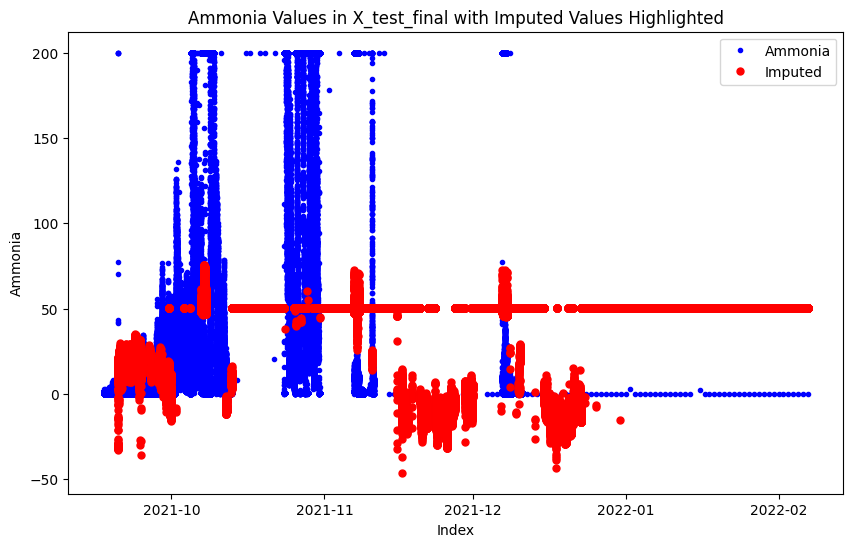

In [96]:
import matplotlib.pyplot as plt

# Plotting the Ammonia values, highlighting imputed values in red
plt.figure(figsize=(10, 6))
plt.plot(X_test_final.index, X_test_final['Ammonia'], 'b.', label='Ammonia')
plt.plot(X_test_final.loc[missing_indices].index, X_test_final.loc[missing_indices, 'Ammonia'], 'r.', label='Imputed', markersize=10)
plt.title('Ammonia Values in X_test_final with Imputed Values Highlighted')
plt.xlabel('Index')
plt.ylabel('Ammonia')
plt.legend()
plt.show()

In [97]:
# Combine the final train and test datasets
X_combined_final = pd.concat([X_train_final, X_test_final], axis=0)

# Identify imputed values in the original train and test datasets
imputed_indices_train = X_train_final.index[
    (X_train_final['Ammonia_missing'] == 1) | (X_train_final['general_missing'] == 1)
]
imputed_indices_test = X_test_final.index[
    (X_test_final['Ammonia_missing'] == 1) | (X_test_final['general_missing'] == 1)
]

# Combine the indices from train and test
imputed_indices = imputed_indices_train.union(imputed_indices_test)


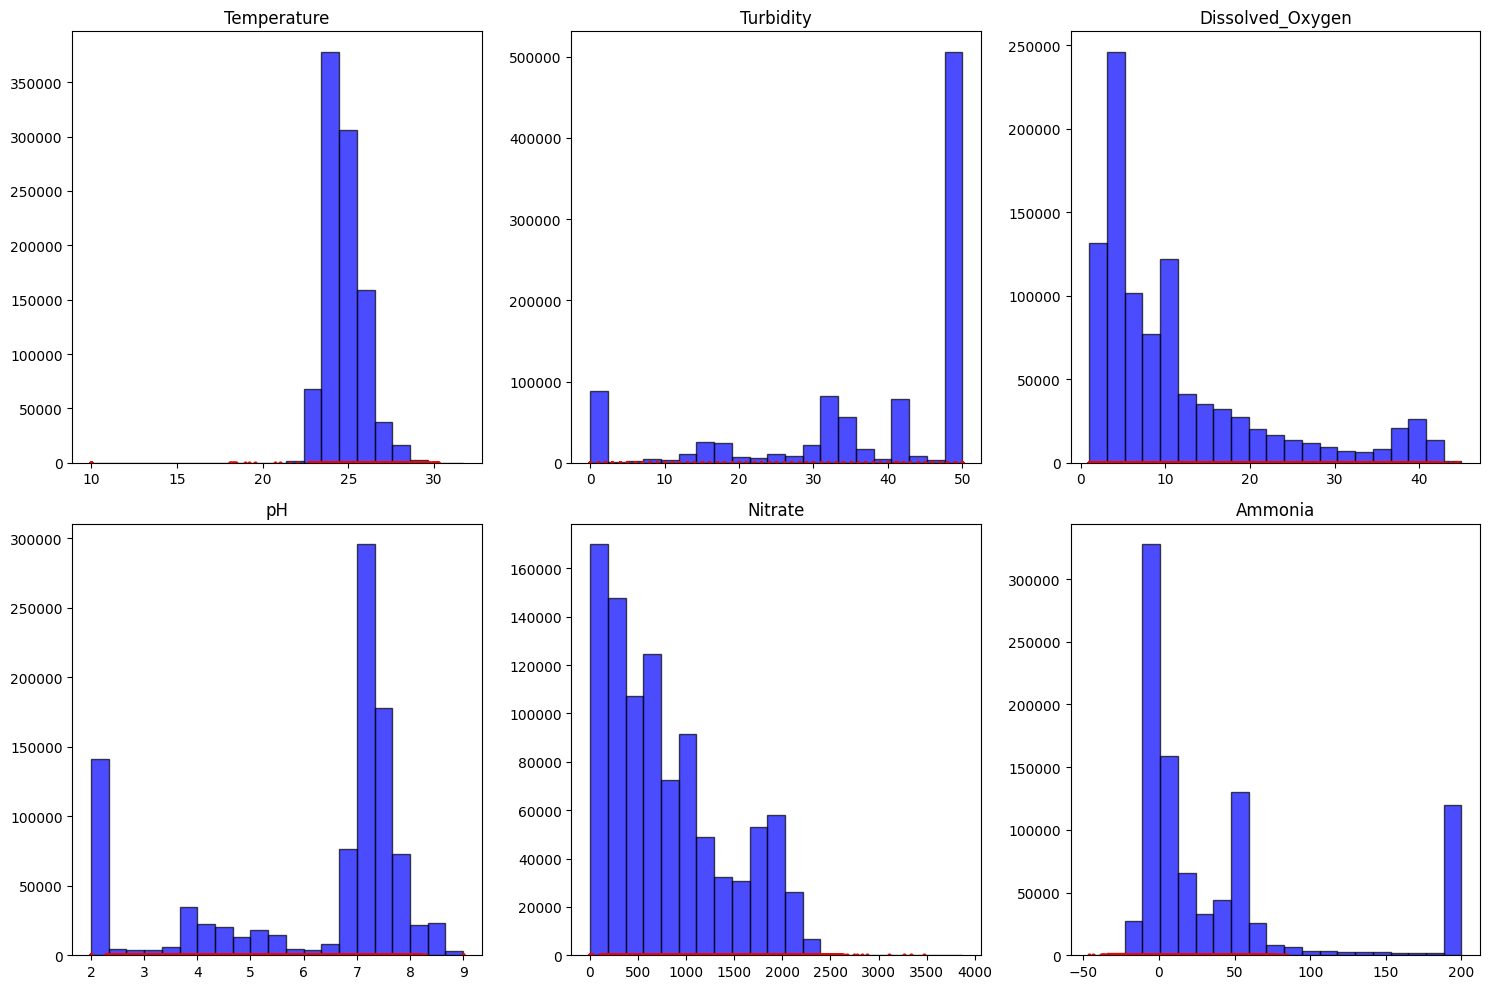

In [98]:
# Ensure the indicator columns are in the dataset
indicator_columns = ['Ammonia_missing', 'Large_Gap', 'general_missing']
existing_columns = [col for col in indicator_columns if col in X_combined_final.columns]

# Exclude the indicator columns
if existing_columns:
    features_to_plot = X_combined_final.columns.drop(existing_columns)
else:
    features_to_plot = X_combined_final.columns

# Determine the number of rows and columns for the subplot grid
num_features = len(features_to_plot)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_features // num_cols) + int(num_features % num_cols > 0)  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.ravel()

for i, column in enumerate(features_to_plot):
    axes[i].hist(X_combined_final[column], bins=21, color='blue', edgecolor='black', alpha=0.7)

    # Highlight imputed values
    imputed_values = X_combined_final.loc[imputed_indices, column]
    axes[i].plot(imputed_values, np.zeros_like(imputed_values) + 1, 'ro', markersize=2)

    axes[i].set_title(f'{column}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

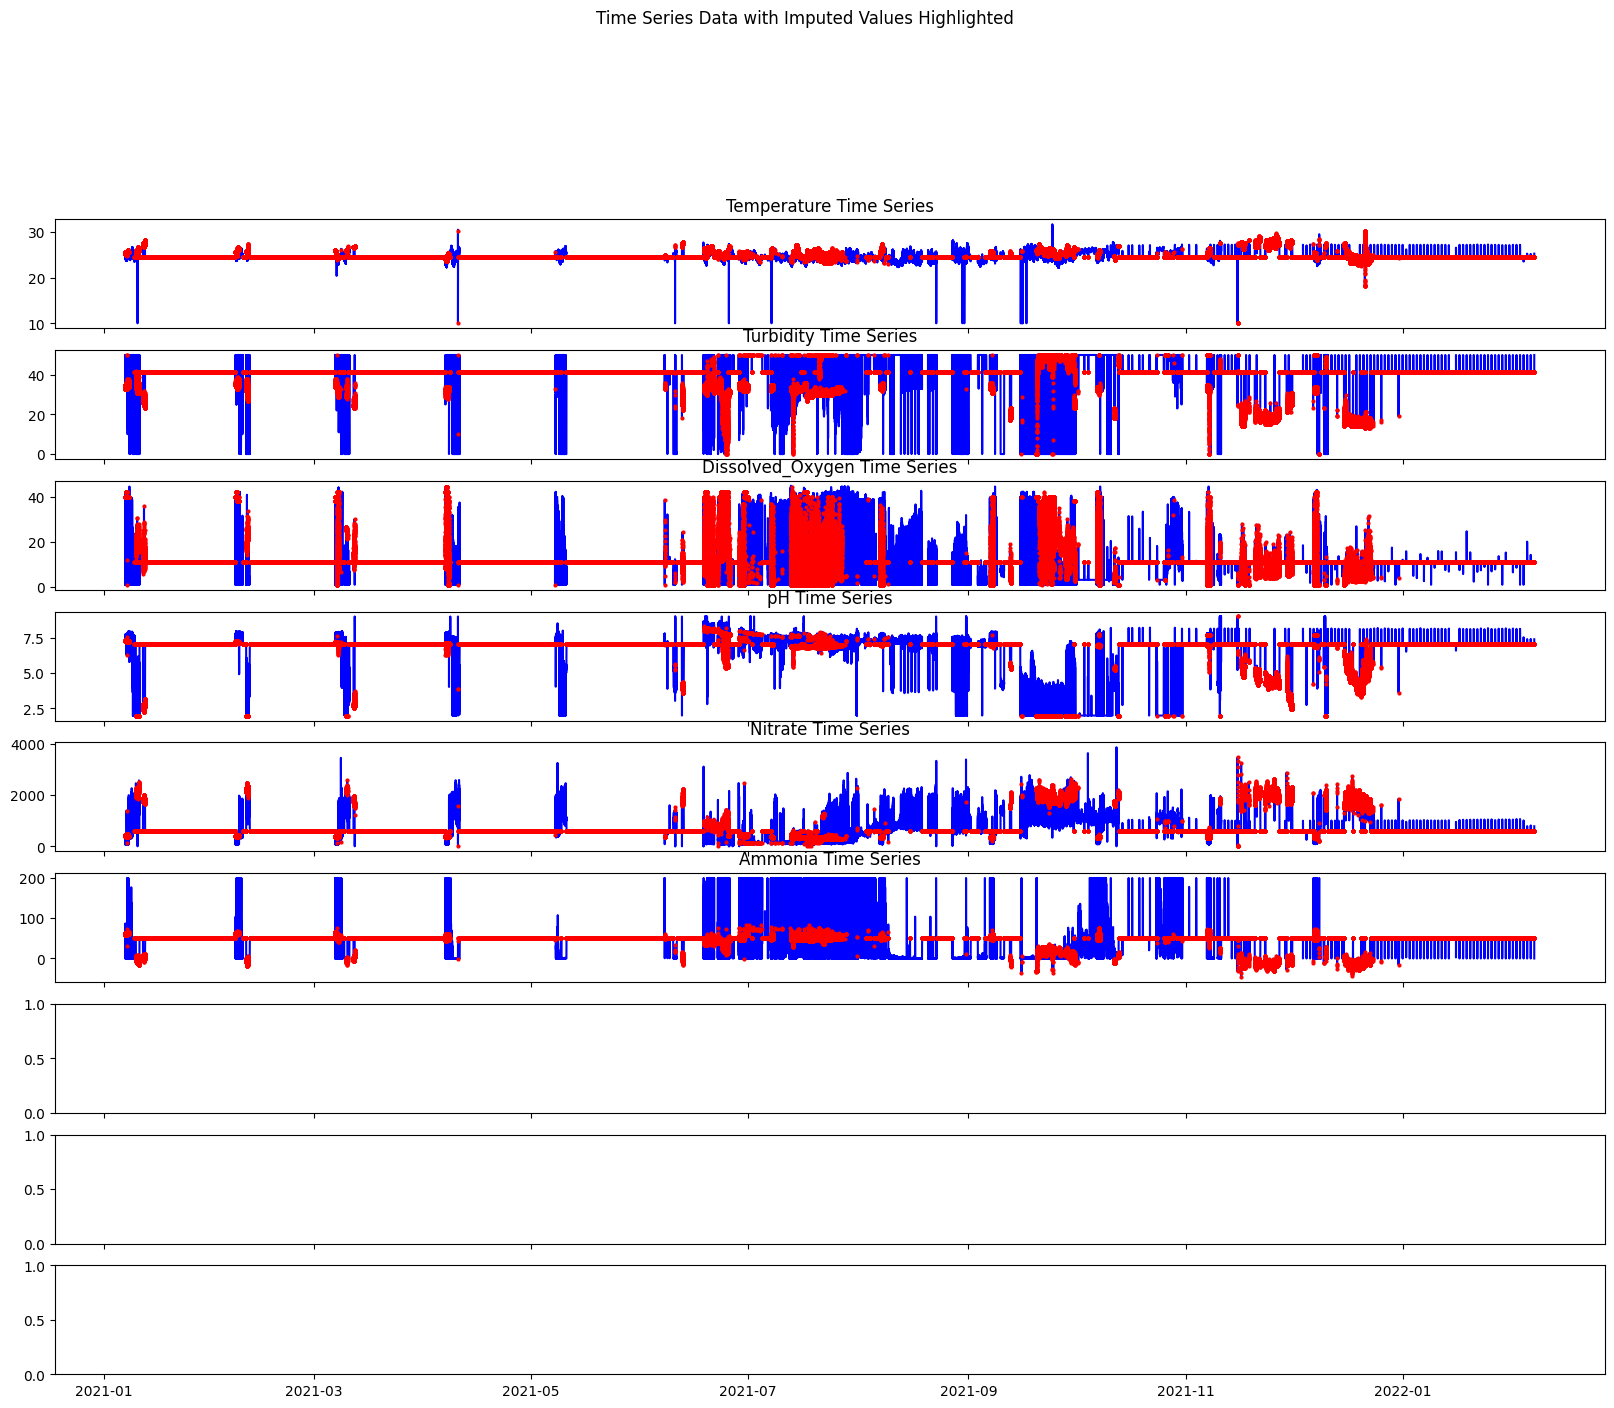

In [99]:
# Plot time series for each feature in X_train_final and X_test_final
fig, axes = plt.subplots(len(X_combined_final.columns), 1, figsize=(20, 15), sharex=True)
for i, column in enumerate(X_combined_final.columns):
    if column not in ['Ammonia_missing', 'Large_Gap', 'general_missing']:  # Exclude indicator columns
        axes[i].plot(X_combined_final.index, X_combined_final[column], 'b-', label='Final')
        imputed_values = X_combined_final.loc[imputed_indices, column]
        axes[i].plot(imputed_values.index, imputed_values, 'ro', markersize=2, label='Imputed')
        axes[i].set_title(f'{column} Time Series')

plt.suptitle("Time Series Data with Imputed Values Highlighted", y=1.02)
plt.show()

Standardization or Min-Max Scaling should be your go-to normalization techniques for anomaly detection using LSTM/GRU with Autoencoder or DBSCAN. These methods will ensure that your models are not skewed by features with different scales or distributions.


In [100]:
# Initialize the StandardScaler
scaler_standard = StandardScaler()

# Identify columns to be transformed (excluding 'Ammonia_missing', 'general_missing', and 'Large_Gap')
columns_to_exclude = ['Ammonia_missing', 'general_missing', 'Large_Gap']
columns_to_transform = [col for col in X_train_final.columns if col not in columns_to_exclude]

# Apply Standardization to the selected columns in training and test data (copy datasets)
X_train_standard = X_train_final.copy()
X_test_standard = X_test_final.copy()

X_train_standard[columns_to_transform] = scaler_standard.fit_transform(X_train_standard[columns_to_transform])
X_test_standard[columns_to_transform] = scaler_standard.transform(X_test_standard[columns_to_transform])

In [101]:
# Initialize the MinMaxScaler
scaler_minmax = MinMaxScaler()

# Apply Min-Max Scaling to the selected columns in training and test data (copy datasets)
X_train_minmax = X_train_final.copy()
X_test_minmax = X_test_final.copy()

X_train_minmax[columns_to_transform] = scaler_minmax.fit_transform(X_train_minmax[columns_to_transform])
X_test_minmax[columns_to_transform] = scaler_minmax.transform(X_test_minmax[columns_to_transform])


In [102]:
# Diagnostic plots function
def diagnostic_plots(df, variable, transformation_name=""):
    plt.figure(figsize=(15,6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.title(f'Histogram of {transformation_name} {variable}')
    
    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)
    plt.title(f'QQ Plot of {transformation_name} {variable}')
    
    plt.show()


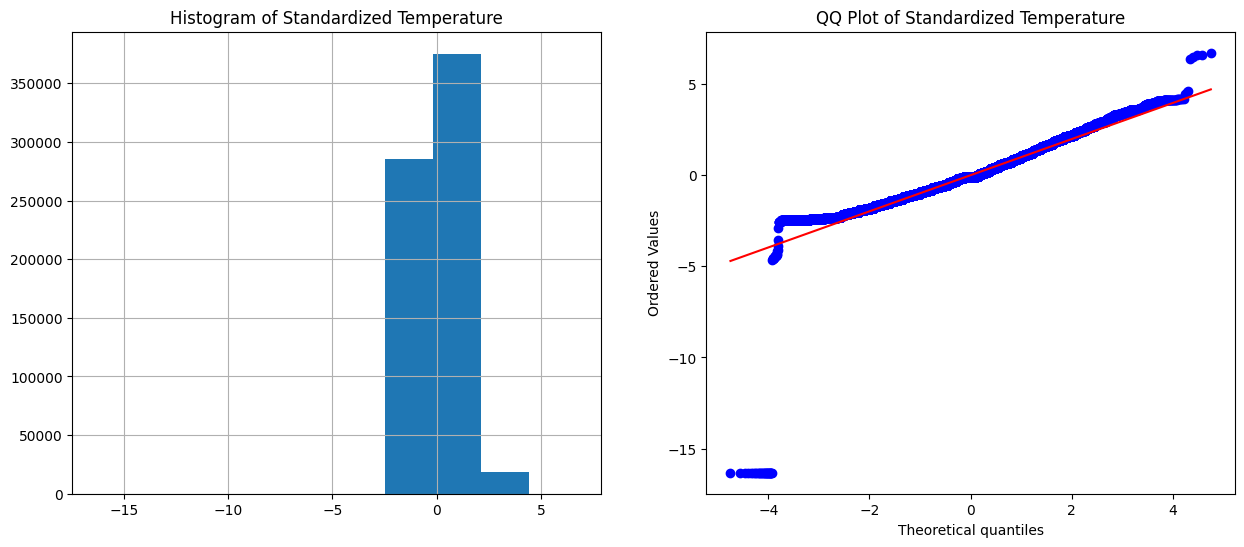

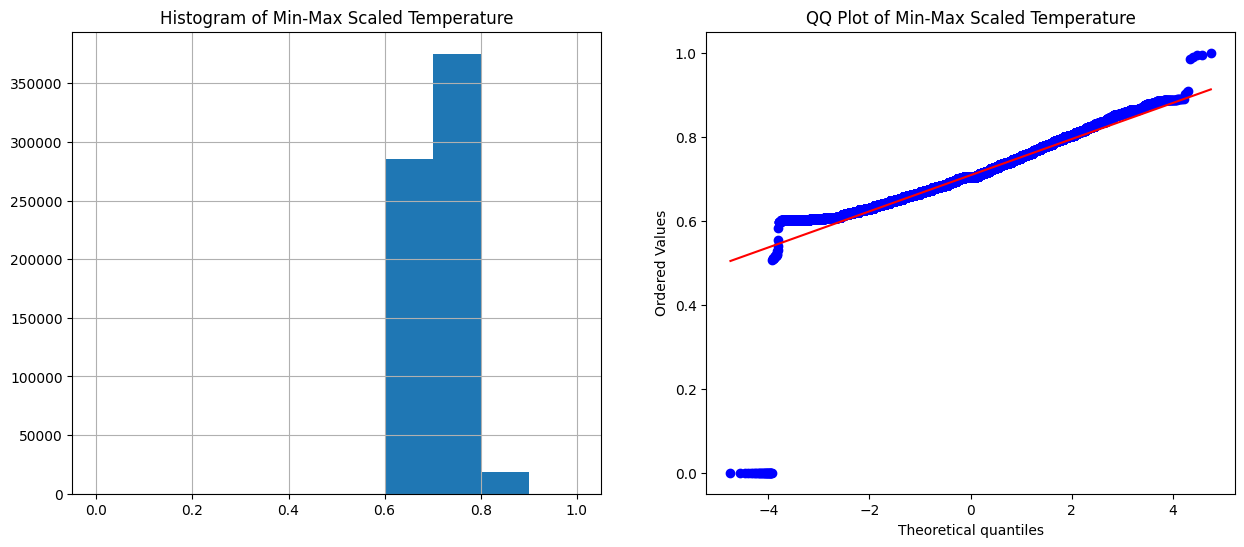

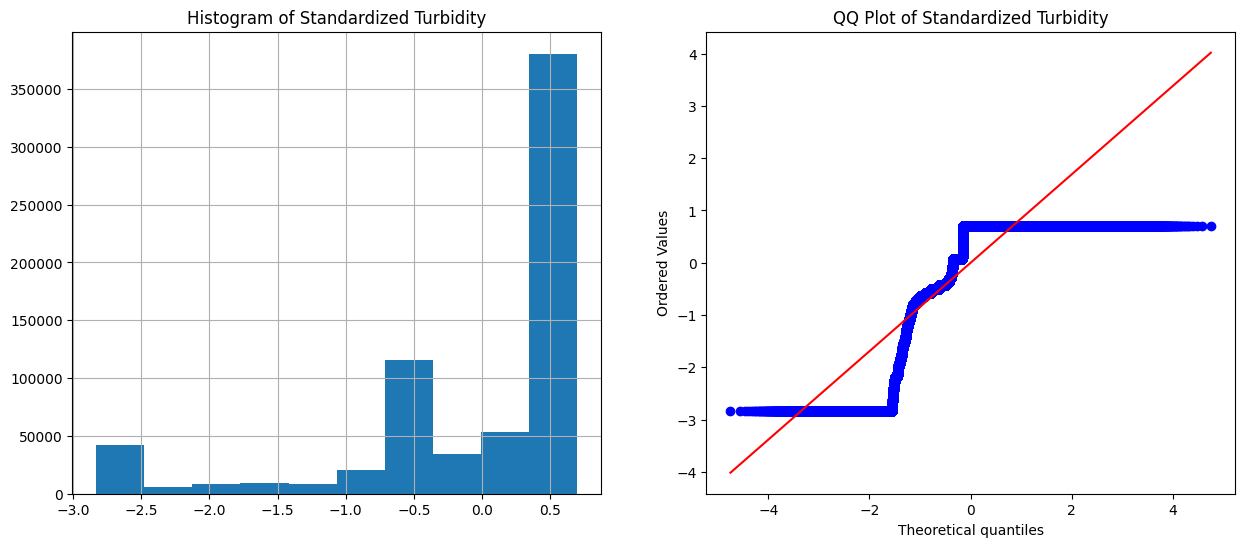

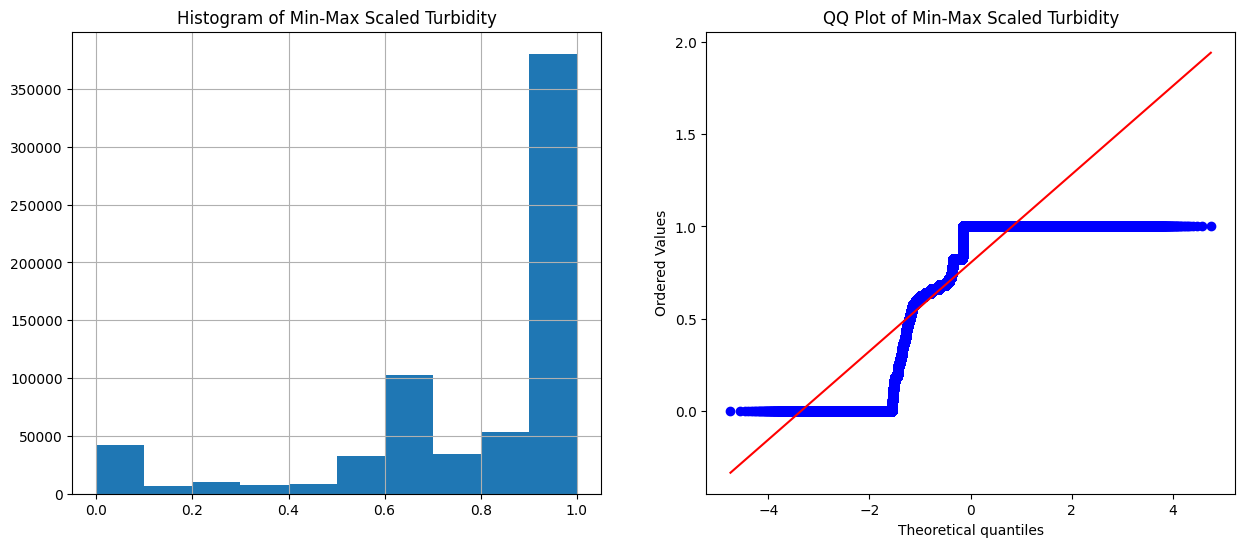

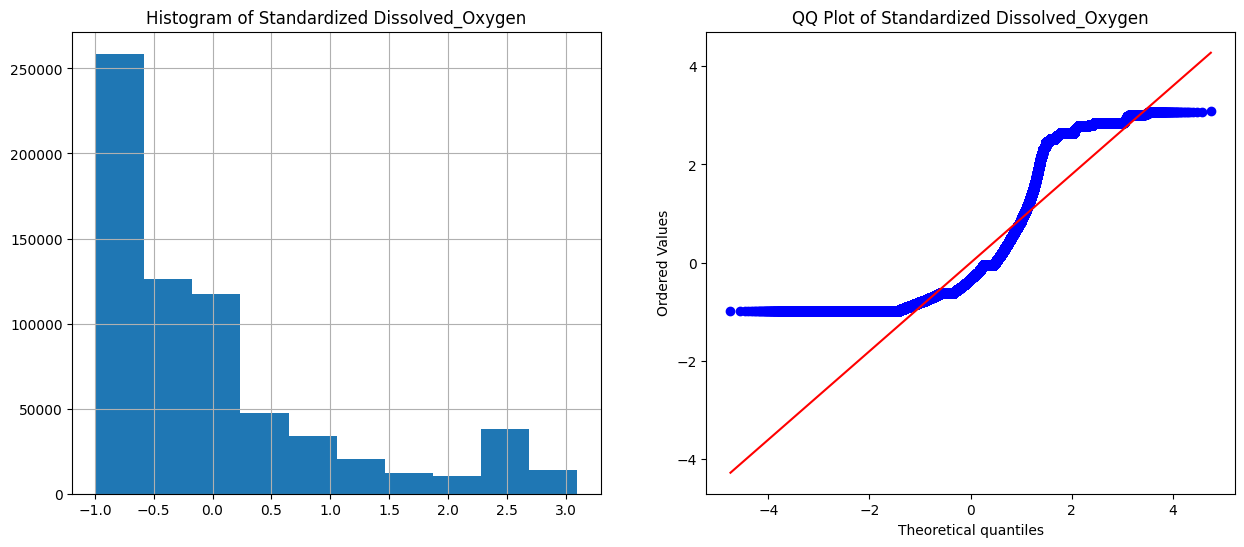

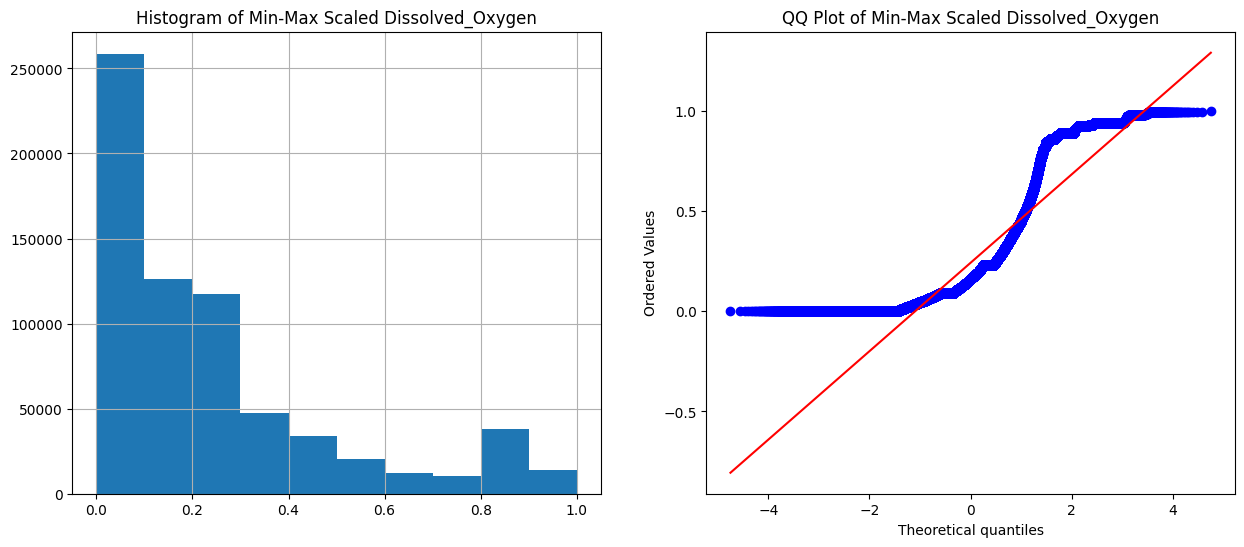

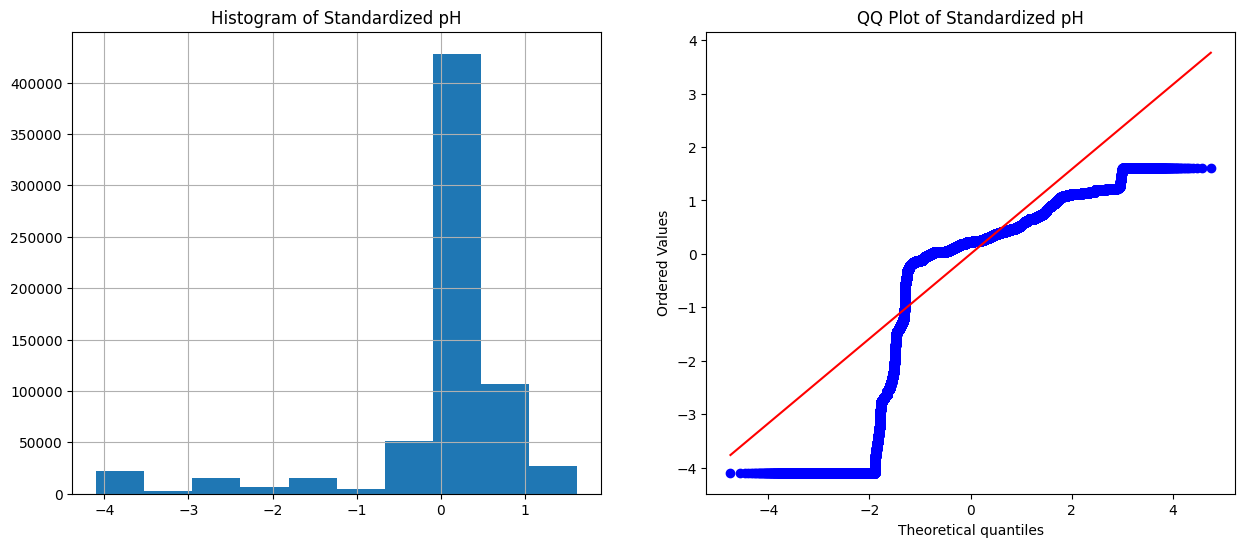

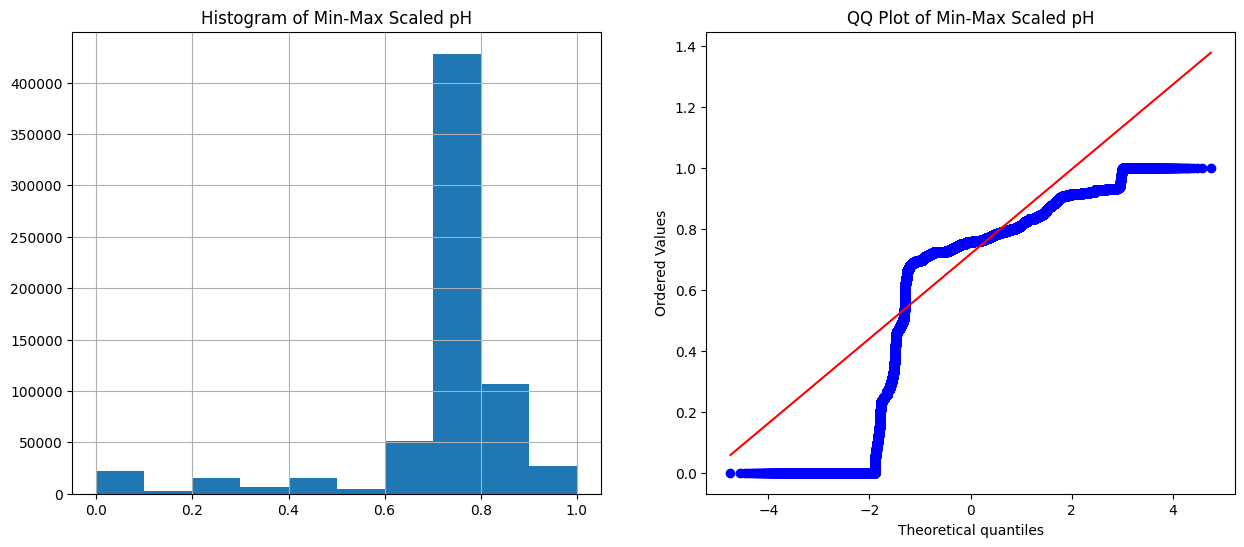

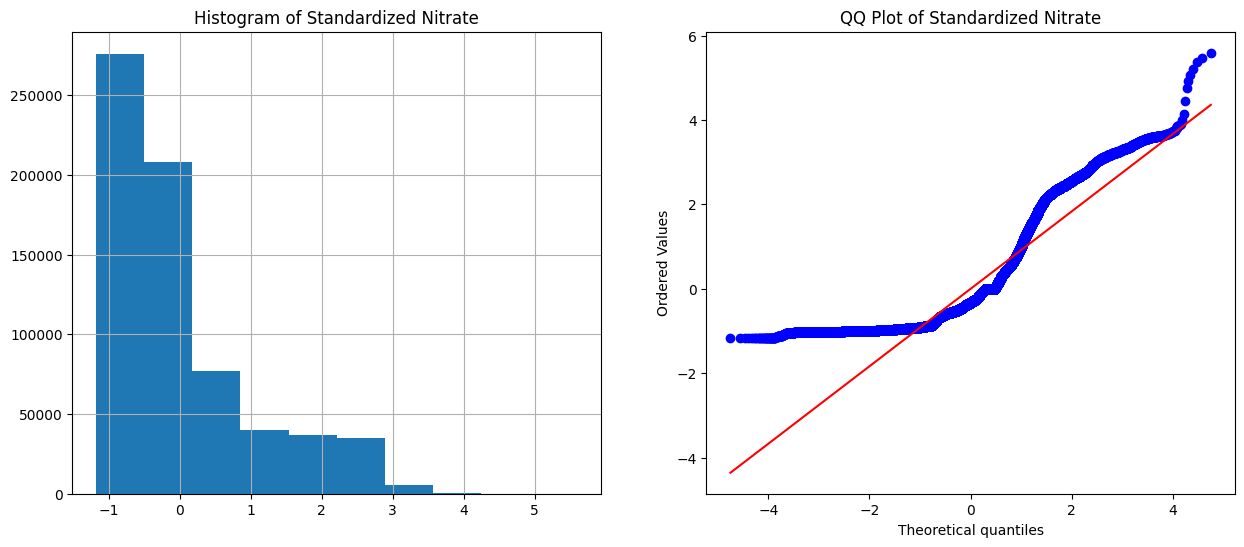

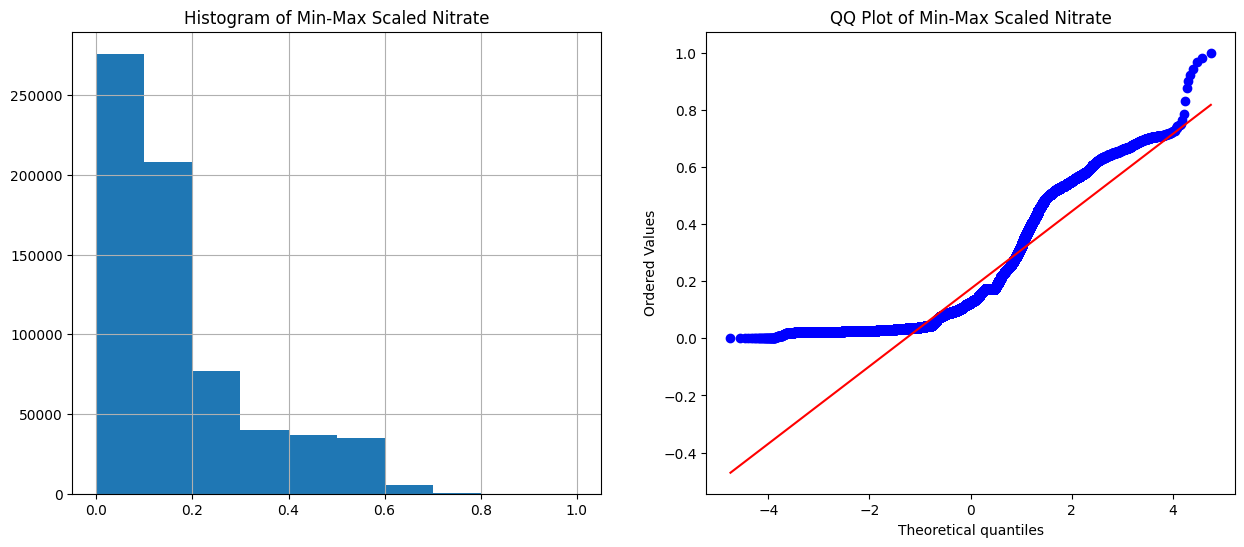

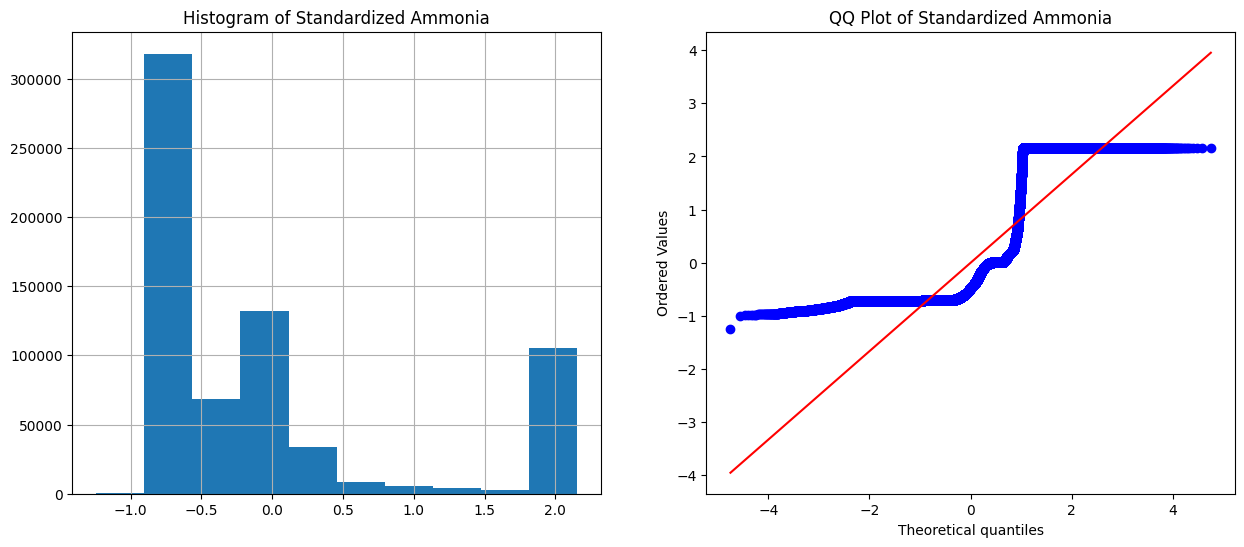

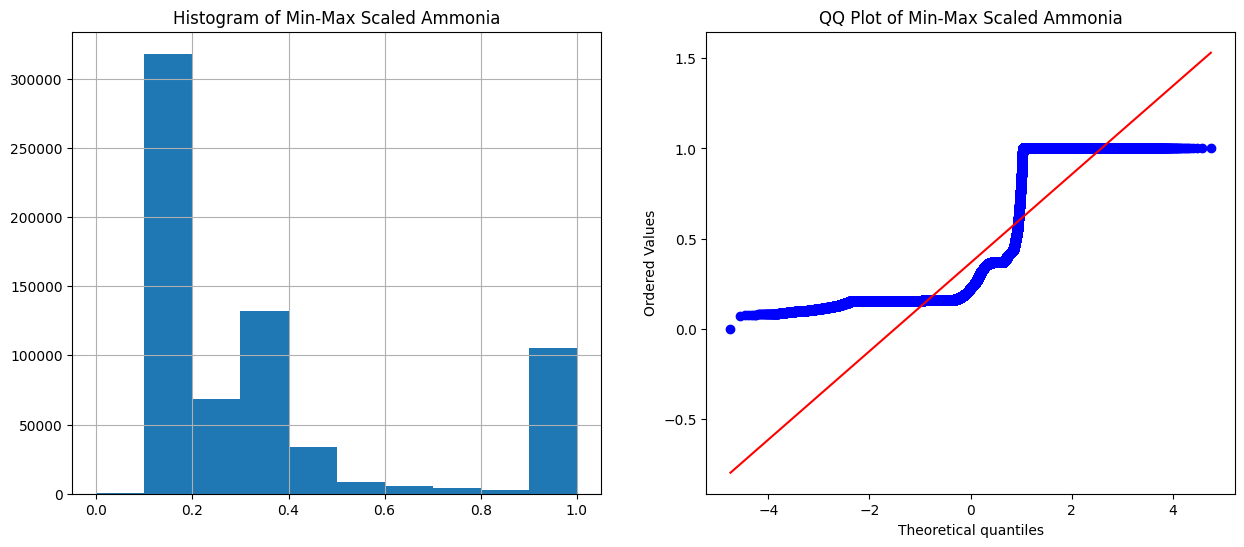

In [103]:
# Plot the diagnostics for Standardization
for col in columns_to_transform:
    diagnostic_plots(X_train_standard, col, transformation_name="Standardized")
    diagnostic_plots(X_train_minmax, col, transformation_name="Min-Max Scaled")

In [104]:
# Function to evaluate normality
def evaluate_normality(df, col_name):
    shapiro_test = shapiro(df[col_name])
    skewness_value = skew(df[col_name])
    kurtosis_value = kurtosis(df[col_name])
    
    return {
        "Shapiro-Wilk p-value": shapiro_test.pvalue,
        "Skewness": skewness_value,
        "Kurtosis": kurtosis_value
    }

# Compare Standardization and Min-Max Scaling
results_standard_vs_minmax = {}

for col in columns_to_transform:
    # Evaluate Standardization
    standard_eval = evaluate_normality(X_train_standard, col)
    
    # Evaluate Min-Max Scaling
    minmax_eval = evaluate_normality(X_train_minmax, col)
    
    results_standard_vs_minmax[col] = {
        "Standardization": standard_eval,
        "Min-Max Scaling": minmax_eval
    }

# Display the results
results_df = pd.DataFrame(results_standard_vs_minmax).T
display(results_df)

,Standardization,Min-Max Scaling
Temperature,"{'Shapiro-Wilk p-value': 0.0, 'Skewness': 0.21...","{'Shapiro-Wilk p-value': 0.0, 'Skewness': 0.21..."
Turbidity,"{'Shapiro-Wilk p-value': 0.0, 'Skewness': -1.5...","{'Shapiro-Wilk p-value': 0.0, 'Skewness': -1.5..."
Dissolved_Oxygen,"{'Shapiro-Wilk p-value': 0.0, 'Skewness': 1.47...","{'Shapiro-Wilk p-value': 0.0, 'Skewness': 1.47..."
pH,"{'Shapiro-Wilk p-value': 0.0, 'Skewness': -2.7...","{'Shapiro-Wilk p-value': 0.0, 'Skewness': -2.7..."
Nitrate,"{'Shapiro-Wilk p-value': 0.0, 'Skewness': 1.30...","{'Shapiro-Wilk p-value': 0.0, 'Skewness': 1.30..."
Ammonia,"{'Shapiro-Wilk p-value': 0.0, 'Skewness': 1.41...","{'Shapiro-Wilk p-value': 0.0, 'Skewness': 1.41..."


Shapiro-Wilk p-value

	•	The Shapiro-Wilk test results in p-values of 0.0 for most features, suggesting that neither Standardization nor Min-Max Scaling is achieving normal distribution. This could be expected given the data’s original skewness or distribution shape.

3. Interpretation and Recommendations

Given the results:

	1.	Uniform Outcomes for Both Methods: The results for Standardization and Min-Max Scaling are very similar, indicating that either method is performing equivalently with the dataset. Since the p-values are consistently low, suggesting non-normality, neither method achieves normality on its own.
	2.	Ammonia Variable: The “nan” value for skewness in Ammonia indicates that this variable might require special handling, perhaps further investigation into outliers or issues with how the data is being transformed.
	3.	Next Steps:
	•	Selection: If the choice between Standardization and Min-Max Scaling doesn’t drastically change the performance of the models, Min-Max Scaling could be a better option since it constrains all features within a consistent range, which might help certain models, especially neural networks.
	•	Anomaly Detection Models: Proceed with either Standardized or Min-Max Scaled data (Min-Max Scaling might be preferred for deep learning models). Given the non-normality, the transformation alone won’t make the data perfectly suitable for methods requiring normality, but this is acceptable for many machine learning models.
		Final Application: Based on my results and these interpretations, apply Min-Max Scaling to my main datasets (X_train_imputed and X_test_imputed), excluding the Ammonia_missing column.


In [105]:
X_train_final.describe()

,Temperature,Turbidity,Dissolved_Oxygen,pH,Nitrate,Ammonia,Ammonia_missing,general_missing
count,678862.000000,678862.000000,678862.000000,678862.000000,678862.000000,678862.000000,678862.000000,678862.000000
mean,24.522834,40.151140,11.637933,7.021822,600.050556,49.731310,0.129602,0.071542
std,0.889592,14.194976,10.774715,1.226497,510.345400,69.853635,0.335865,0.257728
min,10.000000,0.000000,1.000000,2.000000,1.000000,-37.074048,0.000000,0.000000
25%,23.937500,33.000000,4.517000,7.074990,220.000000,0.386180,0.000000,0.000000
50%,24.414522,50.000000,8.017000,7.298780,435.000000,16.236620,0.000000,0.000000
75%,25.062500,50.000000,14.714500,7.539370,800.000000,52.570698,0.000000,0.000000
max,30.500000,50.000000,44.980000,9.000000,3455.000000,200.000000,1.000000,1.000000


In [106]:
# Initialize the MinMaxScaler
scaler_minmax = MinMaxScaler()

# Identify columns to be transformed (excluding 'Ammonia_missing', 'general_missing', and 'Large_Gap')
columns_to_exclude = ['Ammonia_missing', 'general_missing', 'Large_Gap']
columns_to_transform = [col for col in X_train_final.columns if col not in columns_to_exclude]

# Apply Min-Max normalization to the selected columns in training and test data (copy datasets)
X_train_final_minmax = X_train_final.copy()
X_test_final_minmax = X_test_final.copy()

X_train_final_minmax[columns_to_transform] = scaler_minmax.fit_transform(X_train_final[columns_to_transform])
X_test_final_minmax[columns_to_transform] = scaler_minmax.transform(X_test_final[columns_to_transform])

In [107]:
display(X_train_final_minmax)
print(X_train_final_minmax.shape)
X_train_final_minmax.describe()

,Temperature,Turbidity,Dissolved_Oxygen,pH,Nitrate,Ammonia,Ammonia_missing,general_missing,Large_Gap
Date,,,,,,,,,
2021-01-07 00:00:28,0.756098,0.66,0.887858,0.751131,0.120440,0.409559,1,0,False
2021-01-07 00:00:37,0.701220,1.00,0.000000,0.793933,0.073248,0.295887,0,0,False
2021-01-07 00:00:47,0.756098,0.66,0.887858,0.752429,0.120440,0.409604,1,0,False
2021-01-07 00:01:07,0.756098,0.68,0.887858,0.753726,0.119861,0.413845,1,0,False
2021-01-07 00:01:21,0.701220,1.00,0.187062,0.802363,0.026925,0.158848,0,0,False
...,...,...,...,...,...,...,...,...,...
2021-09-17 05:58:11,0.740854,0.72,0.887858,0.000000,0.514476,0.162208,0,0,False
2021-09-17 05:58:12,0.670732,0.00,0.115689,0.249846,0.286914,0.164368,0,0,False
2021-09-17 05:58:23,0.725610,1.00,0.131583,0.059836,0.586277,0.156387,0,0,False


(678862, 9)


,Temperature,Turbidity,Dissolved_Oxygen,pH,Nitrate,Ammonia,Ammonia_missing,general_missing
count,678862.000000,678862.000000,678862.000000,678862.000000,678862.000000,678862.000000,678862.000000,678862.000000
mean,0.708431,0.803023,0.241881,0.717403,0.173437,0.366153,0.129602,0.071542
std,0.043395,0.283900,0.244991,0.175214,0.147755,0.294649,0.335865,0.257728
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.679878,0.660000,0.079968,0.724999,0.063405,0.158011,0.000000,0.000000
50%,0.703147,1.000000,0.159550,0.756969,0.125651,0.224869,0.000000,0.000000
75%,0.734756,1.000000,0.311835,0.791339,0.231326,0.378130,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
display(X_test_final_minmax)
print(X_test_final_minmax.shape)
X_test_final_minmax.describe()

,Temperature,Turbidity,Dissolved_Oxygen,pH,Nitrate,Ammonia,Ammonia_missing,general_missing,Large_Gap
Date,,,,,,,,,
2021-09-17 05:58:31,0.670732,0.000000,0.115689,0.249846,0.284308,0.164279,0,0,False
2021-09-17 05:58:42,0.725610,1.000000,0.142906,0.060484,0.584540,0.156387,0,0,False
2021-09-17 05:58:48,0.701220,0.000000,0.450227,0.000000,0.270122,0.156386,0,0,False
2021-09-17 05:58:49,0.679878,1.000000,0.092769,0.292646,0.127678,0.156386,0,0,False
2021-09-17 05:58:51,0.670732,0.000000,0.112028,0.249197,0.259988,0.164580,0,0,False
...,...,...,...,...,...,...,...,...,...
2022-02-06 23:40:00,0.703147,0.823467,0.228745,0.724999,0.171812,0.369503,0,1,True
2022-02-06 23:45:00,0.703147,0.823467,0.228745,0.724999,0.171812,0.369503,0,1,True
2022-02-06 23:50:00,0.703147,0.823467,0.228745,0.724999,0.171812,0.369503,0,1,True


(290942, 9)


,Temperature,Turbidity,Dissolved_Oxygen,pH,Nitrate,Ammonia,Ammonia_missing,general_missing
count,290942.000000,290942.000000,290942.000000,290942.000000,290942.000000,290942.000000,290942.000000,290942.000000
mean,0.748410,0.665295,0.205030,0.292805,0.362927,0.251670,0.307364,0.088203
std,0.058786,0.379732,0.211803,0.298608,0.164643,0.209503,0.461402,0.283591
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.038186,0.000000,0.000000
25%,0.703147,0.320000,0.050023,0.000000,0.257962,0.156386,0.000000,0.000000
50%,0.740854,0.823467,0.115962,0.267354,0.323683,0.163180,0.000000,0.000000
75%,0.783537,1.000000,0.251069,0.517026,0.528083,0.272248,1.000000,0.000000
max,1.057927,1.000000,0.992156,1.000000,1.120151,1.000000,1.000000,1.000000


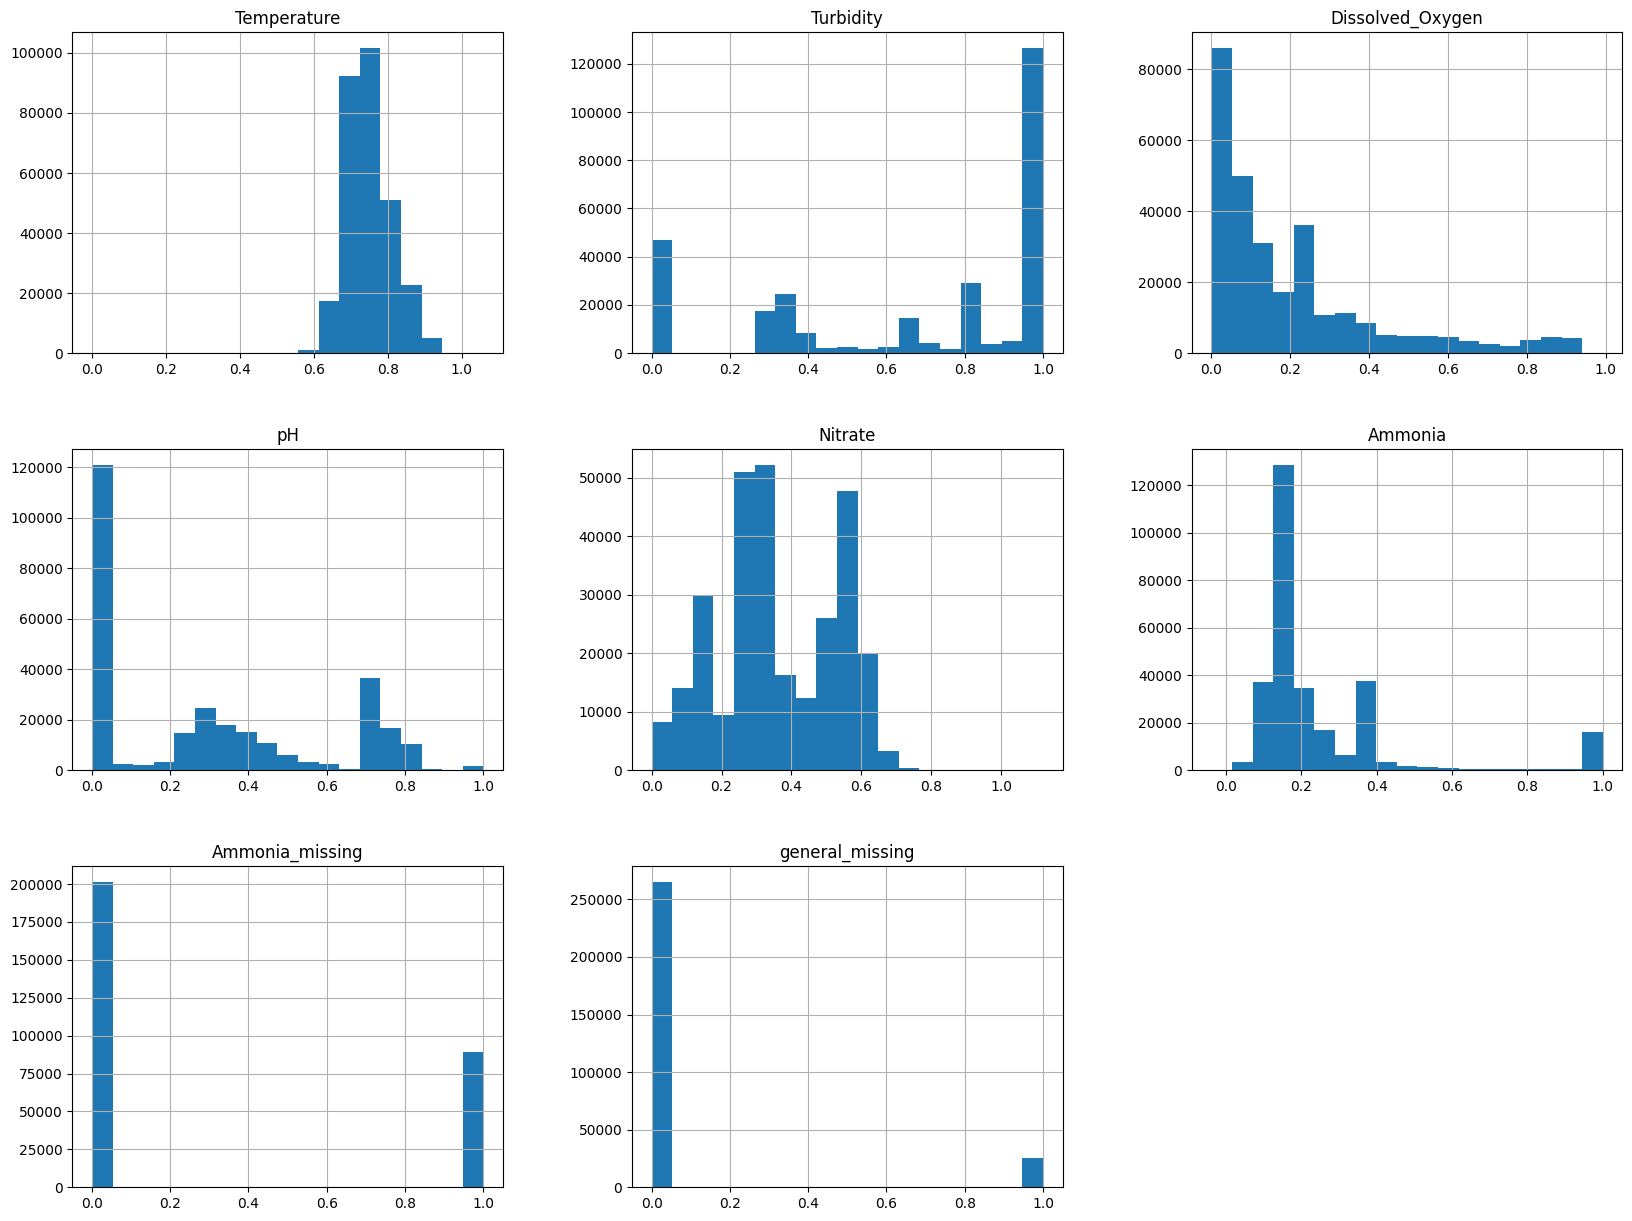

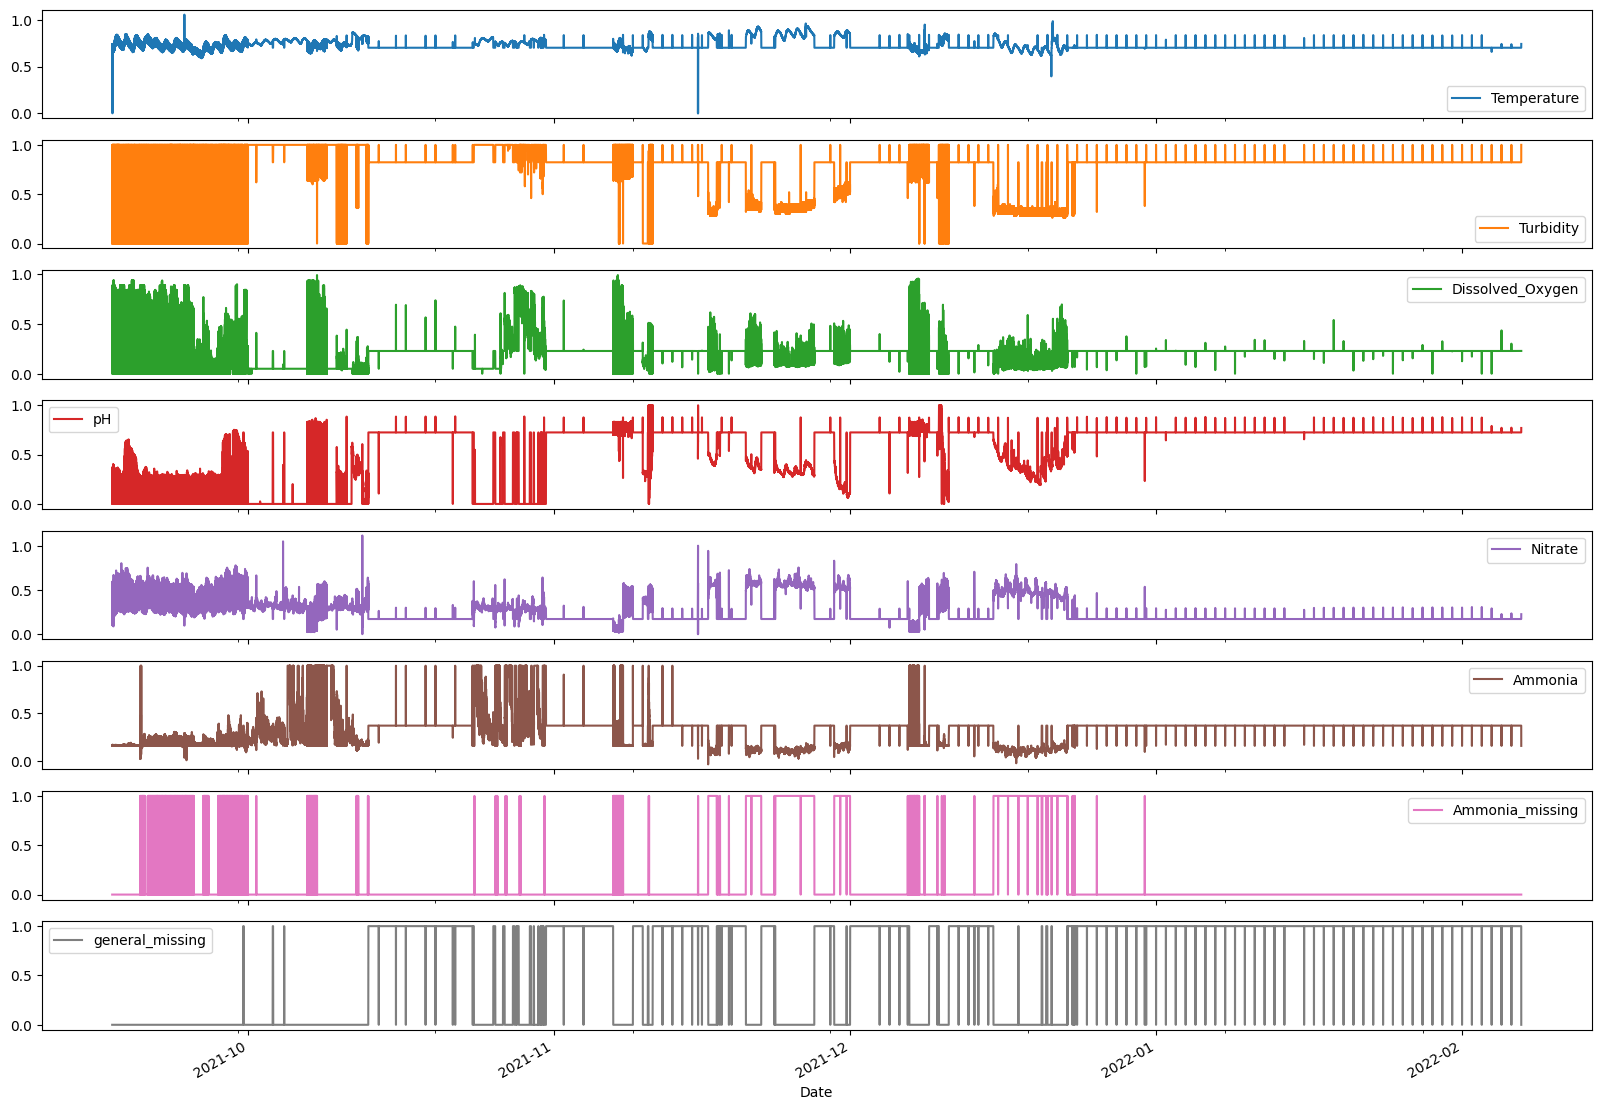

In [109]:
# Plotting the distributions of each feature
X_test_final_minmax.hist(bins=19, figsize=(20, 15))
plt.show()

# Plotting the time series data
X_test_final_minmax.plot(subplots=True, figsize=(20, 15))
plt.show()

In [110]:
# Save the renamed DataFrame to a CSV file
X_train_final_minmax.to_csv("/Users/jabedhossain/Desktop/Python/Fish Farm Project/data/X_train_minmax.csv", index=True)

In [111]:
# Save the renamed DataFrame to a CSV file
X_test_final_minmax.to_csv("/Users/jabedhossain/Desktop/Python/Fish Farm Project/data/X_test_minmax.csv", index=True)

In [115]:
X_train_final_minmax.columns

Index(['Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate',
       'Ammonia', 'Ammonia_missing', 'general_missing', 'Large_Gap'],
      dtype='object')

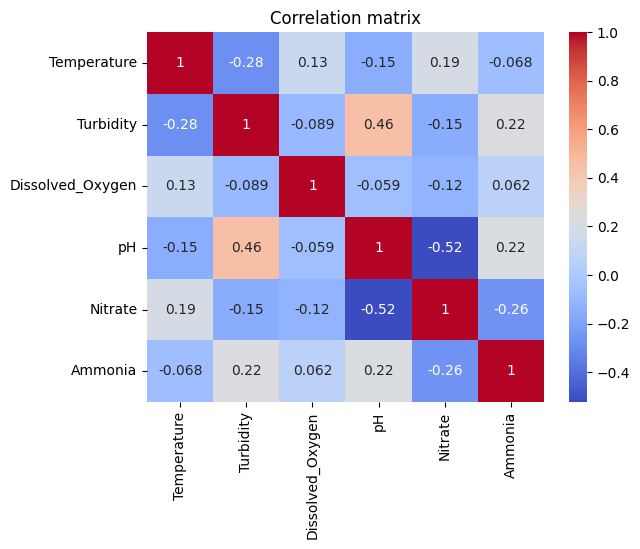

In [120]:
columns=['Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate',
       'Ammonia']

df_corr=X_train_final_minmax[columns]

# Calculate the correlation matrix
corr = df_corr.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

#Add the title to my heatmap 

plt.title('Correlation matrix')
plt.show()